# **1.0. *About Author***
- Project: Google Play Store Data
- Author: Muhammad Awais
- Code Submission Date: 14-03-2023
- Author's Contact Info:\
[Email](mu640560@gmail.com)\
[Github](https://github.com/Mawais911)\
[kaggle](https://www.kaggle.com/mawais911)\
[Linkedin](www.linkedin.com/in/muhammad-awais-a98333372)


# **Google playstore Data**
**Complete Exploratory Data Analysis**

## **2.0. About the Dataset**

### **Source**
The dataset was obtained from Kaggle: [Google Play Store Apps Dataset](https://www.kaggle.com/datasets/lava18/google-play-store-apps/).

### **Context**
While datasets on the Apple App Store are widely available, structured data from the Google Play Store is less common. This scarcity is due to the platform's modern dynamic content loading, which makes automated data collection challenging. In contrast, Apple's App Store allows for relatively straightforward scraping due to its more structured page layout.

### **Content**
Each record in the dataset represents a unique application and contains information such as:
- **Category** – Application genre (e.g., Game, Tools, Education).
- **Rating** – Average user rating.
- **Reviews** – Number of user reviews.
- **Size** – Application size.
- **Installs** – Installation count.
- **Price** – Application cost.
- **Type** – Free or Paid.
- **Content Rating** – Target audience age group.
- **Last Updated** – Last update date.
- **Current Version** – App version.
- **Android Version** – Minimum required Android version.

### Acknowledgements
The dataset was scraped from the Google Play Store. The work of the original data collectors is greatly appreciated.

### 2.1 Executive Summary

This notebook presents a comprehensive exploratory data analysis (EDA) of Google Play Store application data. The objective is to uncover trends, relationships, and anomalies within the dataset to provide actionable insights for developers, marketers, and data enthusiasts. This work follows a structured approach:

1. **Dataset Understanding** – Reviewing the structure, source, and meaning of the data.
2. **Data Cleaning** – Handling missing values, duplicates, and inconsistencies.
3. **Exploratory Analysis** – Identifying trends, outliers, and patterns in categories, ratings, sizes, and pricing.
4. **Insight Generation** – Drawing meaningful business and product recommendations.
5. **Conclusion** – Summarizing findings and outlining possible next steps.

This notebook is open-source and designed for both educational and practical use. Each step is explained in detail to ensure the reasoning behind every action is clear and transparent.

### 2.2 Inspiration
The dataset can be used to:
- Identify which app categories dominate the Play Store.
- Analyze the relationship between app ratings and other factors.
- Explore the distribution of free vs. paid apps.
- Derive business recommendations for developers seeking market success.

### 2.3 Kernel Version Used
- python 3.11

## **3.0. *Import Libraries***
- We will use the follwoing libraries
    1. Pandas: Data manipulation and analysis library.
    2. Numpy: Numerical computing library.
    3. Matplotlib: Data visualization library.
    4. Seaborn: Statistical data visualization library.
    5. Scipy:  To provide a comprehensive set of numerical algorithms and tools for scientific computing in Python.

These libraries form the foundation of most data analysis workflows.

- Importing Libraries

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#this is for jupyter notebook to show the plot in the notebook itself instead of opening a new window for the plot
%matplotlib inline 

## **4.0. Data Loading, Exploration, and Cleaning**

**Objective:** Before we begin analysis, it is crucial to understand the structure of the dataset and ensure it is clean and consistent.

**Steps:**
1. **Loading Data** – Read the CSV file into a Pandas DataFrame.
2. **Initial Exploration** – Inspect the first few rows to familiarize ourselves with the data.
3. **Data Cleaning** – Address missing values, correct data types, and remove invalid or duplicate records.
4. **Outlier Detection** – Identify and handle extreme values that could distort analysis.

Data cleaning ensures that our results are reliable and our insights are valid.

In [117]:
df = pd.read_csv('../data_sets/play_store.csv')

### 4.1. Get a sneak peek of your data
We display the first five rows of the dataset using the `.head()` function. This allows us to verify that the dataset has been loaded correctly and provides a quick preview of its structure.

In [118]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


> **Note**: Some the output of notebook does not present the complete output, therefore we can increase the limit of columns view and row view by using these commands: 

In [119]:
pd.set_option('display.max_columns', None) # this is to display all the columns in the dataframe
pd.set_option('display.max_rows', None) # this is to display all the rows in the dataframe

In [120]:
# hide all warnings runtime
import warnings
warnings.filterwarnings('ignore') 

### 4.2. let's see the exact column names which can be easily copied later on from Google Playstore Dataset

In [121]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

### 4.3. Let's have a look on the shape of the dataset

In [122]:
df.shape

(10841, 13)

Not enough, let's have a look on the columns and their data types using detailed info function

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


# **Observations**
---
1. There are 10841 rows and 13 columns in the dataset
2. The columns are of different data types
3. The columns in the datasets are:
   - `'App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'`
4. There are some missing values in the dataset which we will read in details and deal later on in the notebook.
5. There are some columns which are of object data type but they should be of numeric data type, we will convert them later on in the notebook.
   - `'Size', 'Installs', 'Price'` 

In [124]:
df.describe()

,Rating,Reviews
count,9367.000000,1.084100e+04
mean,4.191513,4.441119e+05
std,0.515735,2.927629e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.476800e+04
max,5.000000,7.815831e+07


## Observations:
---
- We have only 2 columns as numeric data type, rest all are object data type (according to python), but we can see that `'Size', 'Installs', 'Price'` are also numeric, we must convert them to numeric data type in data wrangling process.
---

- Let's clean the `Size` column first

In [125]:
# check for null values
df['Size'].isnull().sum()

np.int64(0)

- No null values, we are good to go.

In [126]:
# check unique values
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

-  There are several uniques values in the `Size` column, we have to first make the unit into one common unit from M and K to bytes, and then remove the `M` and `K` from the values and convert them into numeric data type.

In [127]:
# find the values in size column which has 'M' in it
df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()

np.int64(8830)

In [128]:
# find the values in size column which has 'k' in it
df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()

np.int64(316)

In [129]:
# find the values in size column which has 'Varies with device' in it
df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum()

np.int64(1695)

In [130]:
# Total Values in Size column
df['Size'].value_counts().sum()

np.int64(10841)

In [131]:
# taking sum of all the values in size column which has 'M', 'K' and 'varies with device' in it
8830+316+1695

10841

- We have `8830` values in `M` units
- We have `316` values in `k` units
- We have `1695` value in `Varies with device` 

> Let's convert the `M` and `K` units into bytes and then remove the `M` and `K` from the values and convert them into numeric data type.

In [132]:
# convert the size column to numeric by multiplying the values with 1024 if it has 'k' in it and 1024*1024 if it has 'M' in it
# this function will convert the size column to numeric
def convert_size(size):
    # add function details here
    '''
    This function will convert the size column to numeric by multiplying the values with 1024 if it has 'k' in it and 1024*1024 if it has 'M' in it
    '''
    
    if isinstance(size, str):
        if 'k' in size:
            return float(size.replace('k', '')) * 1024
        elif 'M' in size:
            return float(size.replace('M', '')) * 1024 * 1024
        elif 'Varies with device' in size:
            return np.nan
    return size

df['Size'] = df['Size'].apply(convert_size)

In [133]:
# rename the column name 'Size' to 'Size_in_bytes'
df.rename(columns={'Size': 'Size_in_bytes'}, inplace=True)

In [134]:
# making a new column called 'Size in Mb' which will have the size in MB
df['Size_in_Mb'] = df['Size_in_bytes'].apply(lambda x: x/(1024*1024))

- Now we have converted every value into bytes and removed the `M` and `K` from the values and converted them into numeric data type.
- 'Varies with device' was a string value, therefore we intentionally converted them into null values, which we can fill later on according to our needs.

---
- Let's have a look on the `Installs` column

In [135]:
# check the unique values in size column
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [136]:
# let's have a values counts
df['Installs'].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             908
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: count, dtype: int64

In [137]:
# find how many values has '+' in it
df['Installs'].loc[df['Installs'].str.contains('\+')].value_counts().sum()

np.int64(10840)

In [138]:
# Total values in Installs column
df['Installs'].value_counts().sum()

np.int64(10841)

- The only problem I see here is the `+` sign in the values, let's remove them and convert the column into numeric data type.

- The total values in the `Installs` column are `10841` and there are no null values in the column.
- However, one value 0 has no plus sign

- Let's remove the plus sign `+` and `,` from the values and convert them into numeric data type

In [139]:
# remove the plus sign from install column and convert it to numeric
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
# also remove the commas from the install column
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
# convert the install column to numeric (integers because this is the number of installs/count)
df['Installs'] = df['Installs'].apply(lambda x: int(x))

- Let's verify if the dtypes has been changes and the `+` and `,` sign has been removed

In [140]:
df.head() # check the head of the dataframe

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8


In [141]:
df['Installs'].dtype # this will show the data type of the column

dtype('int64')

- We can generate a new columns based on the installation values, which will be helpful in our analysis

In [142]:
df['Installs'].max() # this will show the value counts of the column

np.int64(1000000000)

In [143]:
# making a new column called 'Installs_category' which will have the category of the installs
bins = [-1, 0, 10, 1000, 10000, 100000, 1000000, 10000000, 10000000000]
labels=['no', 'Very low', 'Low', 'Moderate', 'More than moderate', 'High', 'Very High', 'Top Notch']
df['Installs_category'] = pd.cut(df['Installs'], bins=bins, labels=labels)

In [144]:
df['Installs_category'].value_counts() # check the value counts of the new column

Installs_category
Low                   2162
High                  2118
Very High             2004
More than moderate    1648
Moderate              1531
Top Notch              828
Very low               535
no                      15
Name: count, dtype: int64

- Let's have a look on the `Price` column

In [145]:
# check the unique values in the 'Price' column
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [146]:
df['Price'].isnull().sum()

np.int64(0)

- No Null Values

In [147]:
df['Price'].value_counts() # check the value counts of the 'Price' column

Price
0          10041
$0.99        148
$2.99        129
$1.99         73
$4.99         72
$3.99         63
$1.49         46
$5.99         30
$2.49         26
$9.99         21
$6.99         13
$399.99       12
$14.99        11
$4.49          9
$29.99         7
$3.49          7
$7.99          7
$24.99         7
$5.49          6
$19.99         6
$6.49          5
$8.99          5
$12.99         5
$11.99         5
$10.00         3
$1.00          3
$16.99         3
$2.00          3
$17.99         2
$10.99         2
$9.00          2
$79.99         2
$7.49          2
$3.95          2
$33.99         2
$1.70          2
$13.99         2
$8.49          2
$39.99         2
$1.50          1
$25.99         1
$74.99         1
$15.99         1
$3.88          1
$1.76          1
$3.02          1
$400.00        1
$4.84          1
$2.50          1
$1.59          1
$1.61          1
$4.77          1
$5.00          1
$1.29          1
$379.99        1
$299.99        1
$37.99         1
$18.99         1
$389.99 

- We need to confirm if the values in the `Price` column are only with $ sign or not

In [148]:
# count the values having $ in the 'Price' column
df['Price'].loc[df['Price'].str.contains('\$')].value_counts().sum()

np.int64(800)

In [149]:
# This code counts the number of values in the 'Price' column which contains 0 but does not contain $ sign
df['Price'].loc[(df['Price'].str.contains('0')) & (~df['Price'].str.contains('\$'))].value_counts().sum()


np.int64(10041)

- Now we can confirm that the only currency used is `$` in the `Price` column or 0 value, as `800+10041=10841 Total values`
- The only problem is $ sign let's remove it and convert the column into numeric data type.

In [150]:
# remove the dollar sign from the price column and convert it to numeric
df['Price'] = df['Price'].apply(lambda x: x.replace('$', '') if '$' in str(x) else x)
# convert the price column to numeric (float because this is the price)
df['Price'] = df['Price'].apply(lambda x: float(x))

In [151]:
df['Price'].dtype # this will show the data type of the column

dtype('float64')

In [152]:
# using f string to print the min, max and average price of the apps
print(f"Min price is: {df['Price'].min()} $")
print(f"Max price is: {df['Price'].max()} $")
print(f"Average price is: {df['Price'].mean()} $")

Min price is: 0.0 $
Max price is: 400.0 $
Average price is: 1.0272733142699015 $


### **2.1. Descriptive Statistics**

In [153]:
df.describe()

,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_Mb
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,10841.000000,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,1.027273,21.514141
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,15.948971,22.588679
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,4.900000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,0.000000,30.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000


## Observations:
---
- Now, we have only 6 columns as numeric data type.
- We can observe their descriptive statistics. and make tons of observations as per our hypotheses.
- We can see that the `Rating` column has a minimum value of `1` and a maximum value of `5`, which is the range of rating, and the mean is `4.19` which is a good rating. On an average people give this rating.
- We can see that the `Reviews` column has a minimum value of `0` and a maximum value of `78,158,306` 78+ Millions, which is the range of reviews, and the mean is `444,111.93` which is a good number of reviews. On an average people give this number of reviews to the apps. But it does not make sense to us, as we have different categories of apps.
- Similarly, we can observe the other columns as well.

Therefore, the most important thing is to classify as app based on the correlation matrix and then observe the descriptive statistics of the app category and number of installs, reviews, ratings, etc.

But even before that we have to think about the missing values in the dataset.
---

## **2.2. Dealing with the missing values**
Dealing with the missing values is one of the most important part of the data wrangling process, we must deal with the missing values in order to get the correct insights from the data.

## Where to Learn more about Missing Values?
In the following blog [Missing Values k Rolay](https://codanics.com/missing-values-k-rolay/) you will understand how missing values can change your output if you ignore them and how to deal with them.

- Let's have a look on the missing values in the dataset

In [154]:
df.isnull().sum() # this will show the number of null values in each column

App                     0
Category                1
Rating               1474
Reviews                 0
Size_in_bytes        1695
Installs                0
Type                    1
Price                   0
Content Rating          0
Genres                  1
Last Updated            0
Current Ver             8
Android Ver             2
Size_in_Mb           1695
Installs_category       0
dtype: int64

In [155]:
df.isnull().sum().sort_values(ascending=False) # this will show the number of null values in each column in descending order

Size_in_bytes        1695
Size_in_Mb           1695
Rating               1474
Current Ver             8
Android Ver             2
Type                    1
Category                1
Genres                  1
Installs                0
App                     0
Reviews                 0
Last Updated            0
Content Rating          0
Price                   0
Installs_category       0
dtype: int64

In [156]:
df.isnull().sum().sum() # this will show the total number of null values in the dataframe

np.int64(4877)

In [157]:
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False) # this will show the percentage of null values in each column

Size_in_bytes        15.635089
Size_in_Mb           15.635089
Rating               13.596532
Current Ver           0.073794
Android Ver           0.018448
Type                  0.009224
Category              0.009224
Genres                0.009224
Installs              0.000000
App                   0.000000
Reviews               0.000000
Last Updated          0.000000
Content Rating        0.000000
Price                 0.000000
Installs_category     0.000000
dtype: float64

- Let's plot the missing values in the dataset

<Axes: >

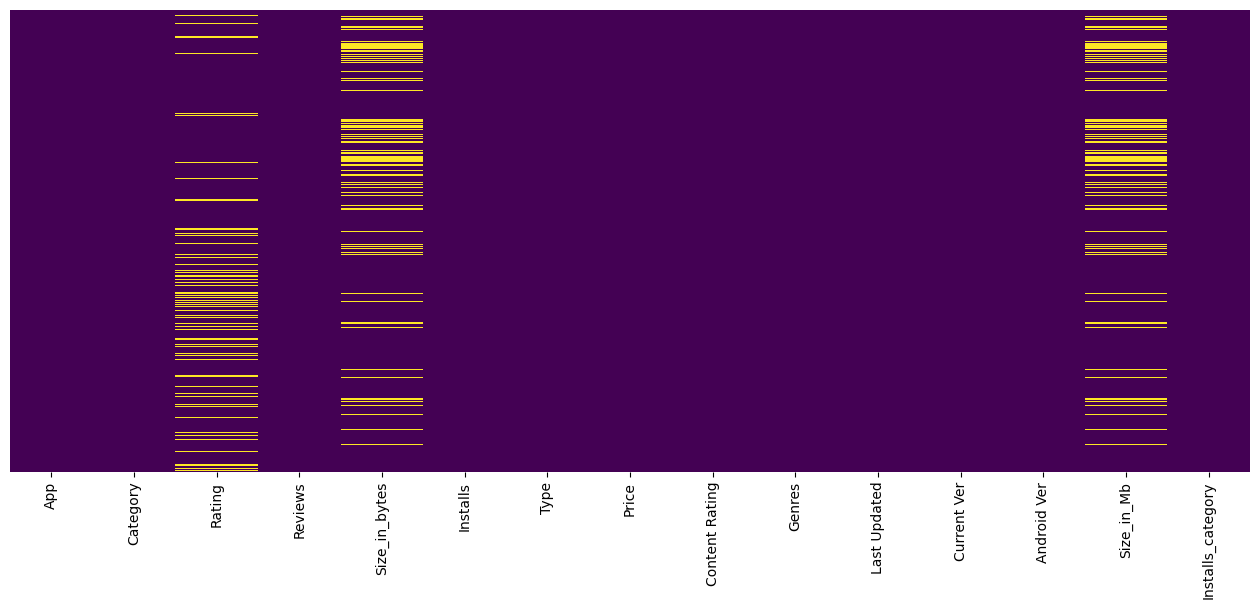

In [158]:
# make a figure size
plt.figure(figsize=(16, 6))
#plot the null values in each column
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis') # this will show the heatmap of null values in the dataframe

> **Figure-1:** Provide us the visual on the missing values in a dataframe 'df'

- There is another way, let's plot the missing values by percentage

Text(0.5, 1.0, 'Percentage of Missing Values in each Column')

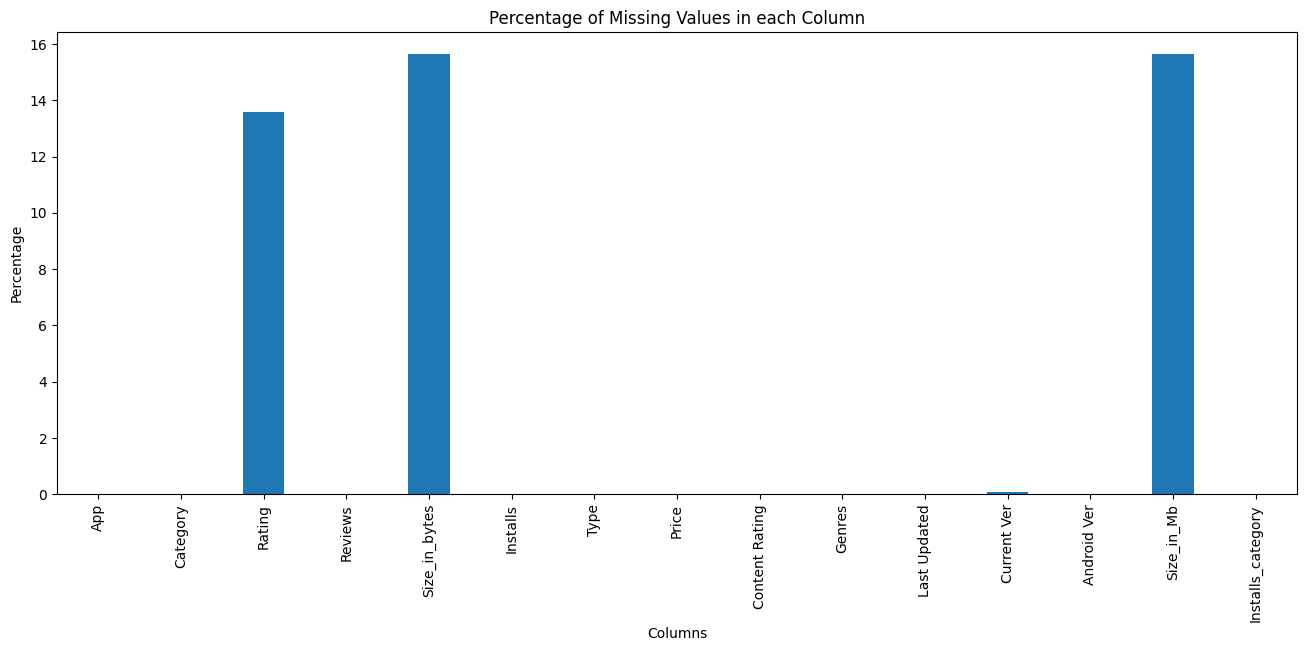

In [159]:
# make figure size
plt.figure(figsize=(16, 6))
# plot the null values by their percentage in each column
missing_percentage = df.isnull().sum()/len(df)*100
missing_percentage.plot(kind='bar')
# add the labels
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Percentage of Missing Values in each Column')

> **Figure-2:** It is obvious that due to high presence of null values inside Rating, Size_in_bytes, Size_in_Mb column, all other null values are not visible

- Let's plot the missing values other than 'Rating', 'Size_in_bytes' and 'Size_in_Mb' column
- We have missing percentage columns other than rating having less than one percent of missing values, we will plot them as follows:

Text(0.5, 1.0, 'Percentage of Missing Values in each Column without Rating column')

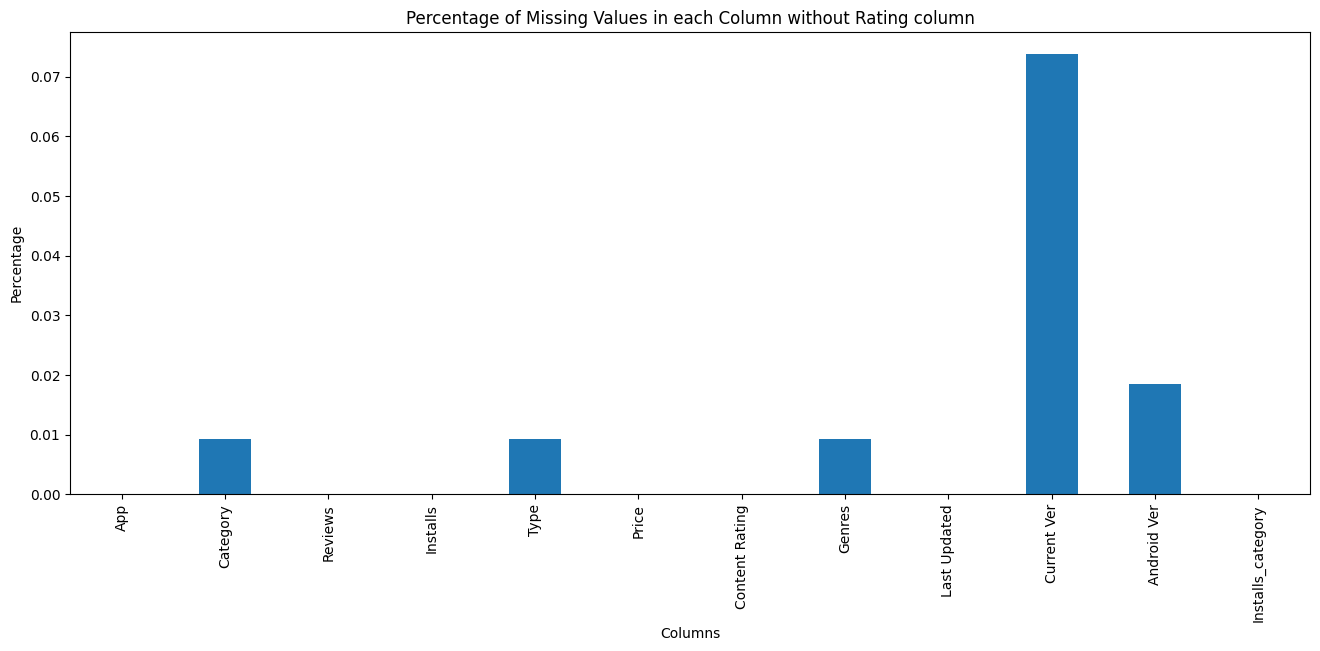

In [160]:
plt.figure(figsize=(16, 6)) # make figure size
missing_percentage[missing_percentage < 1].plot(kind='bar') # plot the null values by their percentage in each column
plt.xlabel('Columns') # add the x-axis labels
plt.ylabel('Percentage') # add the labels for y-axis
plt.title('Percentage of Missing Values in each Column without Rating column')  # add the title for the plot

> **Figure-3** It show those columns which have less than 1 persent missing values

In [161]:
df.isnull().sum().sort_values(ascending=False) # this will show the number of null values in each column in descending order

Size_in_bytes        1695
Size_in_Mb           1695
Rating               1474
Current Ver             8
Android Ver             2
Type                    1
Category                1
Genres                  1
Installs                0
App                     0
Reviews                 0
Last Updated            0
Content Rating          0
Price                   0
Installs_category       0
dtype: int64

In [162]:
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False) # this will show the percentage of null values in each column

Size_in_bytes        15.635089
Size_in_Mb           15.635089
Rating               13.596532
Current Ver           0.073794
Android Ver           0.018448
Type                  0.009224
Category              0.009224
Genres                0.009224
Installs              0.000000
App                   0.000000
Reviews               0.000000
Last Updated          0.000000
Content Rating        0.000000
Price                 0.000000
Installs_category     0.000000
dtype: float64

## Observations:
---
- We have 1695 missing values in the `'Size_in_bytes'` and `'Size_in_Mb'` columns, which is 15.6% of the total values in the column.
- We have 1474 missing values in the `'Rating'` column, which is 13.6% of the total values in the column.
- We have 8 missing value in the `'Current Ver'` column, which is 0.07% of the total values in the column.
- We have 2 missing values in the `'Android Ver'` column, which is 0.01% of the total values in the column.
- We have only 1 missing value in `Category`, `Type` and `Genres` columns, which is 0.009% of the total values in the column.

### **2.3. Dealing with the missing values**
- We can not impute the `Rating` column as is is directly linked with the installation column. To test this Hypothesis we need to plot the `Rating` column with the `Installs` and `Size` columns and statistically test it using `pearson correlation test`.
---

- Let's run the correlations

In [163]:
df.describe() # these are numeric columns

,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_Mb
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,10841.000000,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,1.027273,21.514141
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,15.948971,22.588679
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,4.900000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,0.000000,30.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000


<Axes: >

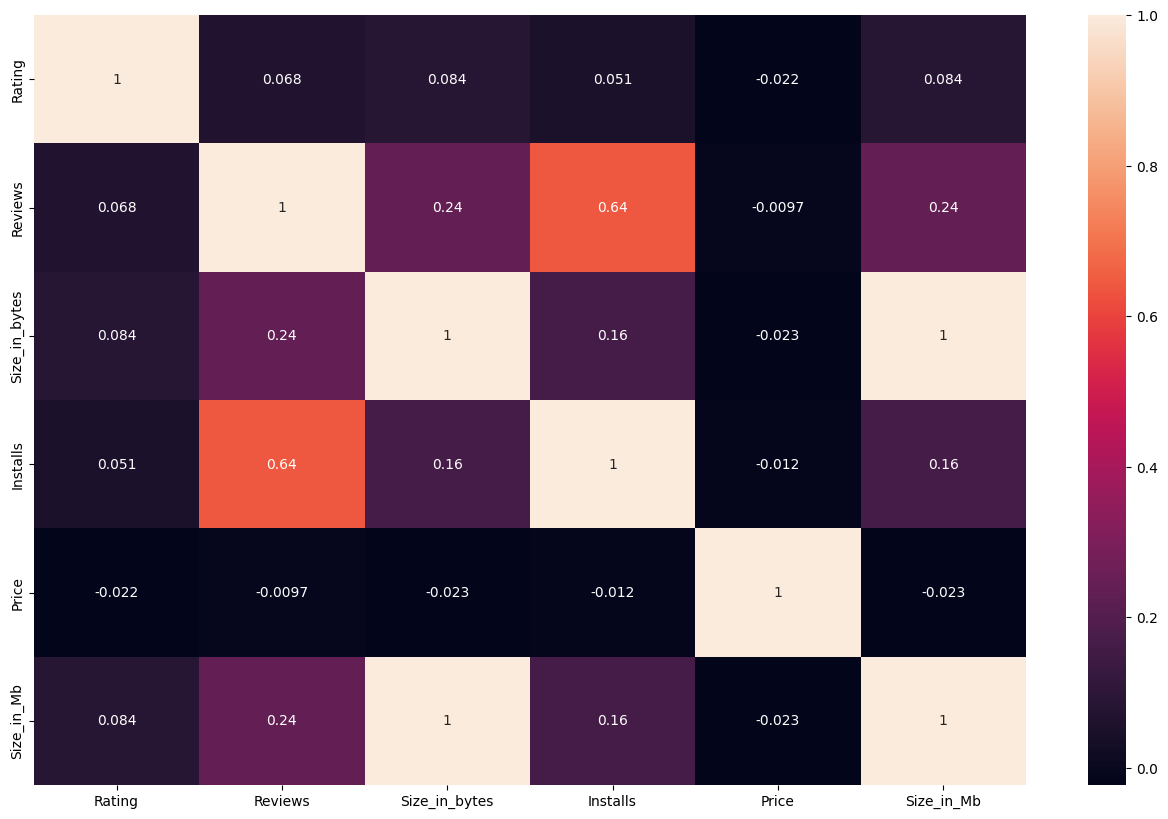

In [164]:
# Make a correlation matrix of numeric columns
plt.figure(figsize=(16, 10)) # make figure size  
numeric_cols = ['Rating', 'Reviews', 'Size_in_bytes', 'Installs', 'Price', 'Size_in_Mb'] # make a list of numeric columns
sns.heatmap(df[numeric_cols].corr(), annot=True) # plot the correlation matrix

> **Figure-4** Show the correlation in columns

In [165]:
# we can also calculate the correlation matrix using pandas
df[numeric_cols].corr() # this will show the correlation matrix

,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_Mb
Rating,1.000000,0.068147,0.084098,0.051393,-0.021851,0.084098
Reviews,0.068147,1.000000,0.238218,0.643123,-0.009666,0.238218
Size_in_bytes,0.084098,0.238218,1.000000,0.164794,-0.023000,1.000000
Installs,0.051393,0.643123,0.164794,1.000000,-0.011688,0.164794
Price,-0.021851,-0.009666,-0.023000,-0.011688,1.000000,-0.023000
Size_in_Mb,0.084098,0.238218,1.000000,0.164794,-0.023000,1.000000


In [166]:
# we can calculate the pearson correlation coefficient using scipy as well as follows

# this is to install scipy if you have not done it before
# pip install scipy 
from scipy import stats

# remove rows containing NaN or infinite values (Important to calculate Pearson's R)
df_clean = df.dropna()

# calculate Pearson's R between Rating and Installs
pearson_r, _ = stats.pearsonr(df_clean['Reviews'], df_clean['Installs'])
print(f"Pearson's R between Reviews and Installs: {pearson_r:.4f}")

Pearson's R between Reviews and Installs: 0.6262


---
## **Observations**
- Lighter color shows the high correlation and darker color shows the low correlation
- We can see that the `Reviews` column has a high correlation with the `Installs` column, which is `0.64` according to corr(). Which is quite good.
  - This shows that the more the reviews the more the installs are for one app. If in any case we need to impute reviews we have to think of number of install.
    - If we have an app with `2` installs and we imputer the reviews with `1000` or via average reviews then it will be wrong.
- Installs is slightly correlated with `Size_in_Mb` or `Size_in_bytes` , which is `0.16`, this also shows us the importance of size and Installs. But we can not depend on it as the Pearson correlation is very low.
---

- Before going ahead, let's remove the rows with missing values in the `Current Ver`, `Android Ver`, `Category`, `Type` and `Genres` columns, as they are very less in number and will not affect our analysis.

In [167]:
# length before removing null values
print(f"Length of the dataframe before removing null values: {len(df)}")

Length of the dataframe before removing null values: 10841


In [168]:
# remove the rows having null values in the 'Current Ver', 'Android Ver', 'Category', 'Type' and 'Genres' column
df.dropna(subset=['Current Ver', 'Android Ver', 'Category', 'Type', 'Genres'], inplace=True)

In [169]:
# length after removing null values
print(f"Length of the dataframe after removing null values: {len(df)}")

Length of the dataframe after removing null values: 10829


- We have removed `12` rows having null values in the `Current Ver`, `Android Ver`, `Category`, `Type` and `Genres` columns.

In [170]:
# let's check the null values again
df.isnull().sum().sort_values(ascending=False)

Size_in_bytes        1694
Size_in_Mb           1694
Rating               1469
Category                0
Reviews                 0
Installs                0
App                     0
Type                    0
Price                   0
Genres                  0
Content Rating          0
Last Updated            0
Current Ver             0
Android Ver             0
Installs_category       0
dtype: int64

---
## **Observations**
- Only `Rating` and `Size_in_bytes` or `Size_in_Mb` columns are left with missing values.
  - We know that we have to be carefull while deadling with `Rating` column, as it is directly linked with the `Installs` column.
  - In Size columns we already know about `Varies with device` values, which we have converted into null values, we do not need to impute at the moment, as every app has different size and nobody can predict that as nearly as possible.
---

In [171]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_in_bytes', 'Installs',
       'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'Size_in_Mb', 'Installs_category'],
      dtype='object')

In [172]:
# use groupby function to find the trend of Rating in each Installs_category
df.groupby('Installs_category')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Installs_category,,,,,,,,
no,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Very low,81.0,4.637037,0.845199,1.0,4.8,5.0,5.0,5.0
Low,1278.0,4.170970,0.825605,1.0,3.8,4.4,4.8,5.0
Moderate,1440.0,4.035417,0.604428,1.4,3.8,4.2,4.5,5.0
More than moderate,1616.0,4.093255,0.505619,1.6,3.9,4.2,4.5,4.9
High,2113.0,4.207525,0.376594,1.8,4.0,4.3,4.5,4.9
Very High,2004.0,4.287076,0.294902,2.0,4.1,4.3,4.5,4.9
Top Notch,828.0,4.374396,0.193726,3.1,4.3,4.4,4.5,4.8


In [173]:
df['Rating'].isnull().sum() # check the number of null values in the Rating column

np.int64(1469)

In [174]:
df.head(23)

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Installs_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0,Moderate
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7,Very High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0,Top Notch
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8,More than moderate
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5872025.6,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,5.6,More than moderate
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19922944.0,50000,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up,19.0,More than moderate
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,30408704.0,1000000,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up,29.0,High
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,34603008.0,1000000,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up,33.0,High
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3250585.6,10000,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up,3.1,Moderate


In [175]:
# imputing the null values in the Rating column with respect to the Installs_category
df['Rating'] = df.groupby('Installs_category')['Rating'].transform(lambda x: x.fillna(x.mean()))

In [176]:
df.head(23)

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Installs_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19922944.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0,Moderate
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14680064.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,9122611.2,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7,Very High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,26214400.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0,Top Notch
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2936012.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8,More than moderate
5,Paper flowers instructions,ART_AND_DESIGN,4.400000,167,5872025.6,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,5.6,More than moderate
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.800000,178,19922944.0,50000,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up,19.0,More than moderate
7,Infinite Painter,ART_AND_DESIGN,4.100000,36815,30408704.0,1000000,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up,29.0,High
8,Garden Coloring Book,ART_AND_DESIGN,4.400000,13791,34603008.0,1000000,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up,33.0,High
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.700000,121,3250585.6,10000,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up,3.1,Moderate


In [177]:
df['Rating'].isnull().sum() # check the number of null values in the Rating column

np.int64(14)

In [178]:
df['Rating'].isnull().sum()

np.int64(14)

In [179]:
# in which Install_category the Rating has NaN values
df['Installs_category'].loc[df['Rating'].isnull()].value_counts()

Installs_category
no                    14
Very low               0
Low                    0
Moderate               0
More than moderate     0
High                   0
Very High              0
Top Notch              0
Name: count, dtype: int64

- Let's plot this and have a look

Text(7, 3.5, 'Null values: 0')

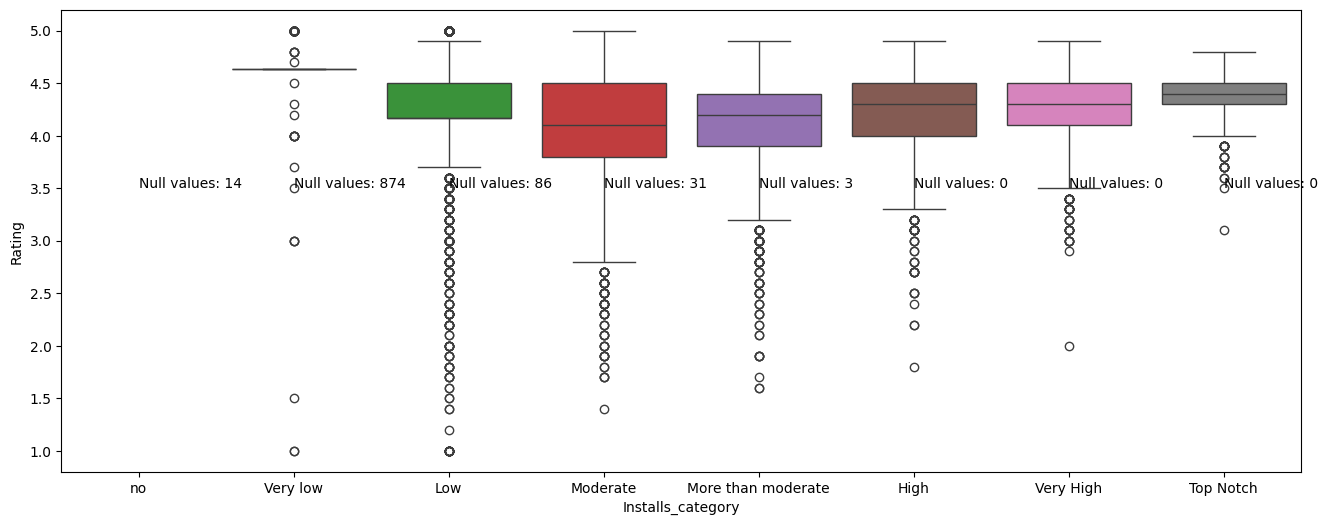

In [180]:
# plot the boxplot of Rating in each Installs_category
plt.figure(figsize=(16, 6)) # make figure size
sns.boxplot(x='Installs_category', y='Rating', hue='Installs_category', data=df) # plot the boxplot
# add the text of number of null values in each category
plt.text(0, 3.5, 'Null values: 14')
plt.text(1, 3.5, 'Null values: 874')
plt.text(2, 3.5, 'Null values: 86')
plt.text(3, 3.5, 'Null values: 31')
plt.text(4, 3.5, 'Null values: 3')
plt.text(5, 3.5, 'Null values: 0')
plt.text(6, 3.5, 'Null values: 0')
plt.text(7, 3.5, 'Null values: 0')

> **Figure-5** Show the missing values according to install_category

- Let's check if there is any similar link with Reviews as well

In [181]:
# in which Install_category the Rating has NaN values
df['Installs_category'].loc[df['Reviews'].isnull()].value_counts()

Installs_category
no                    0
Very low              0
Low                   0
Moderate              0
More than moderate    0
High                  0
Very High             0
Top Notch             0
Name: count, dtype: int64

- There are no Null values in Reviews

<Axes: xlabel='Installs_category', ylabel='Reviews'>

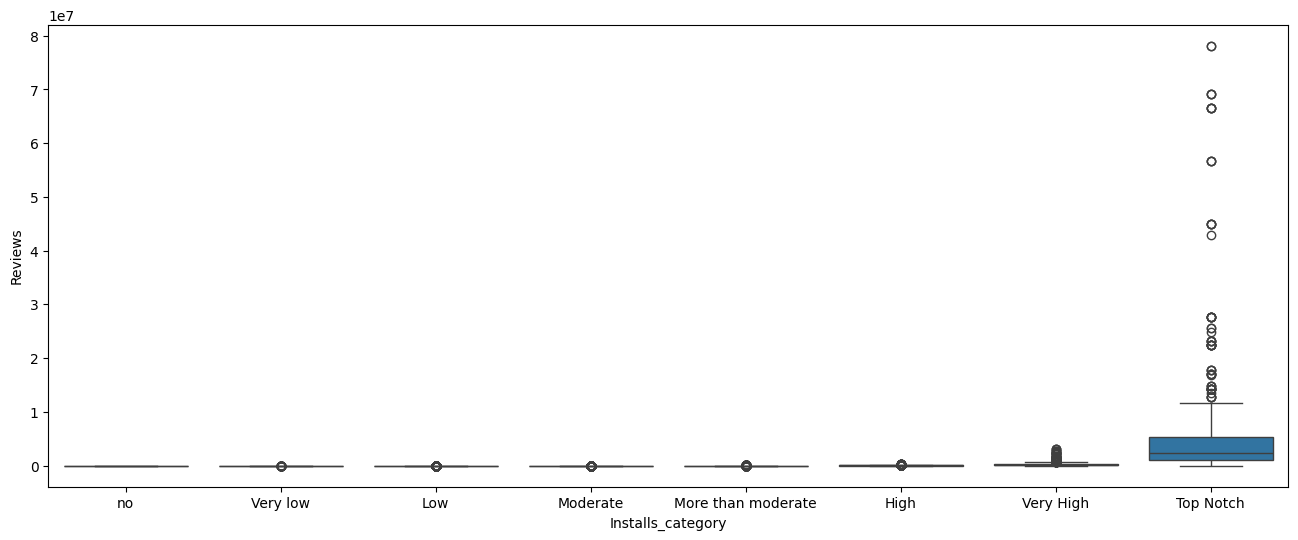

In [182]:
# let's plot the same plots for Reviews column as well
plt.figure(figsize=(16, 6)) # make figure size
sns.boxplot(x='Installs_category', y= 'Reviews', data=df) # plot the boxplot

> **Figure-6** Show which Install_category the Rating has NaN values

- The data looks really imbalance, let's normalize the data using log transformation

<Axes: xlabel='Installs_category', ylabel='Reviews'>

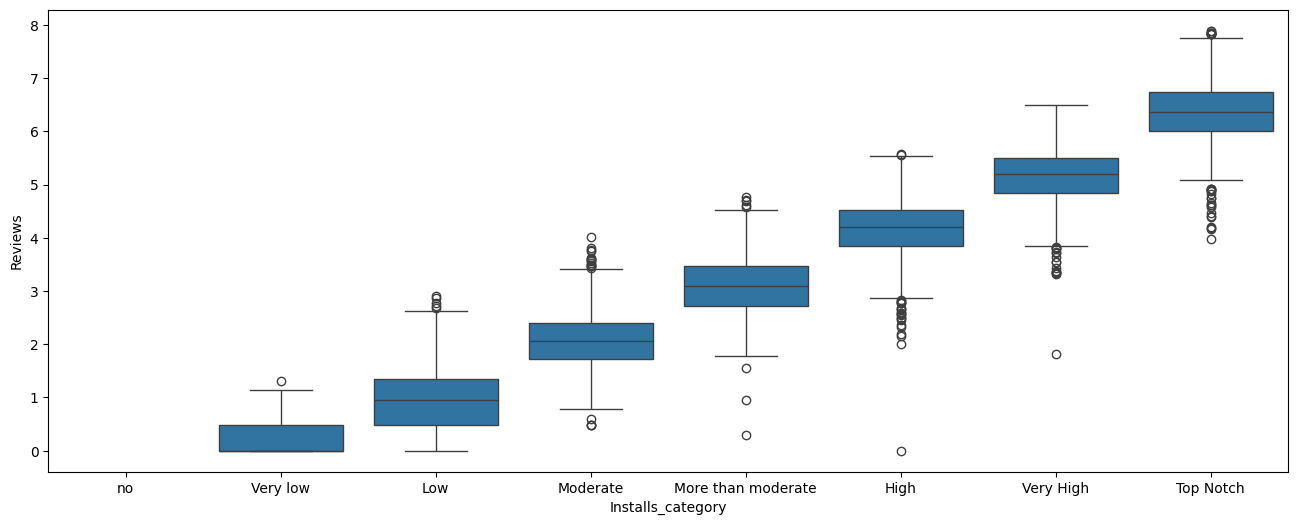

In [183]:
# let's plot the same plots for Reviews column as well
plt.figure(figsize=(16, 6)) # make figure size
sns.boxplot(x='Installs_category', y= np.log10(df['Reviews']), data=df) # plot the boxplot

> **Figure-7** Show which Install_category the Reviews has NaN values

- We also draw the scatter plot of the `Rating` and `Review` columns with the `Installs` column

<Axes: xlabel='Rating', ylabel='Reviews'>

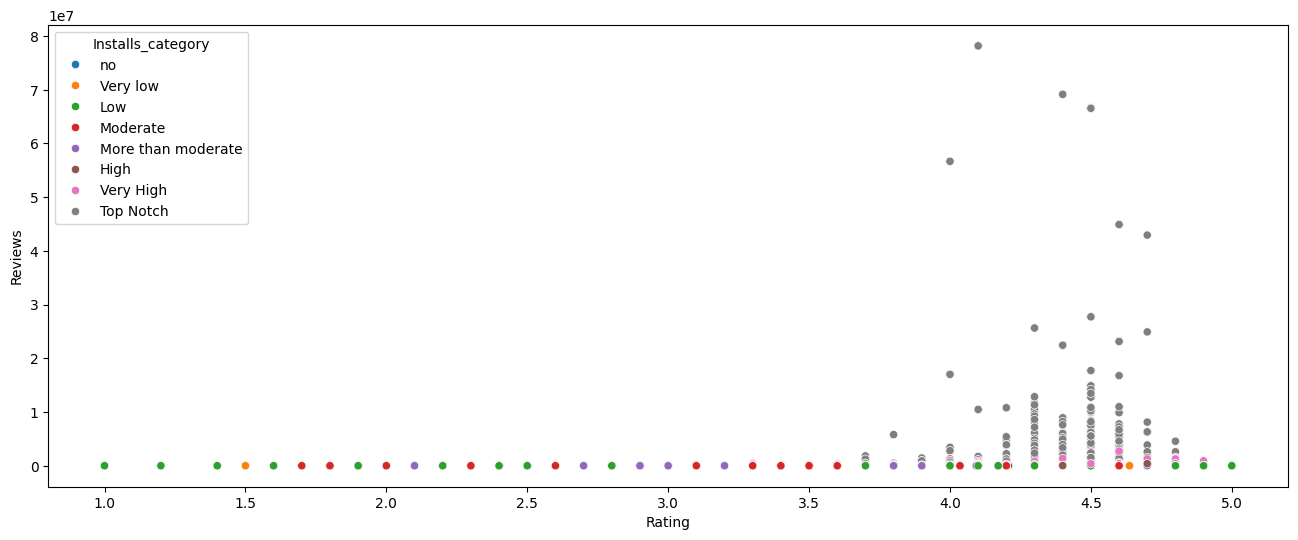

In [184]:
# Draw a scatter plot between Rating, Reviews and Installs
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x='Rating', y='Reviews', hue='Installs_category', data=df) # plot the scatter plot

> **Figure-8** scatter plot show the `Rating` and `Review` columns with the `Installs` column

- figure-8 doesn't show any trend, because, you should know that Rating is a categorical variable (Ordinal) and Reviews is a continuous variable, therefore, we can not plot them together.
- Let's try with Reviews and Installs

<Axes: xlabel='Reviews', ylabel='Installs'>

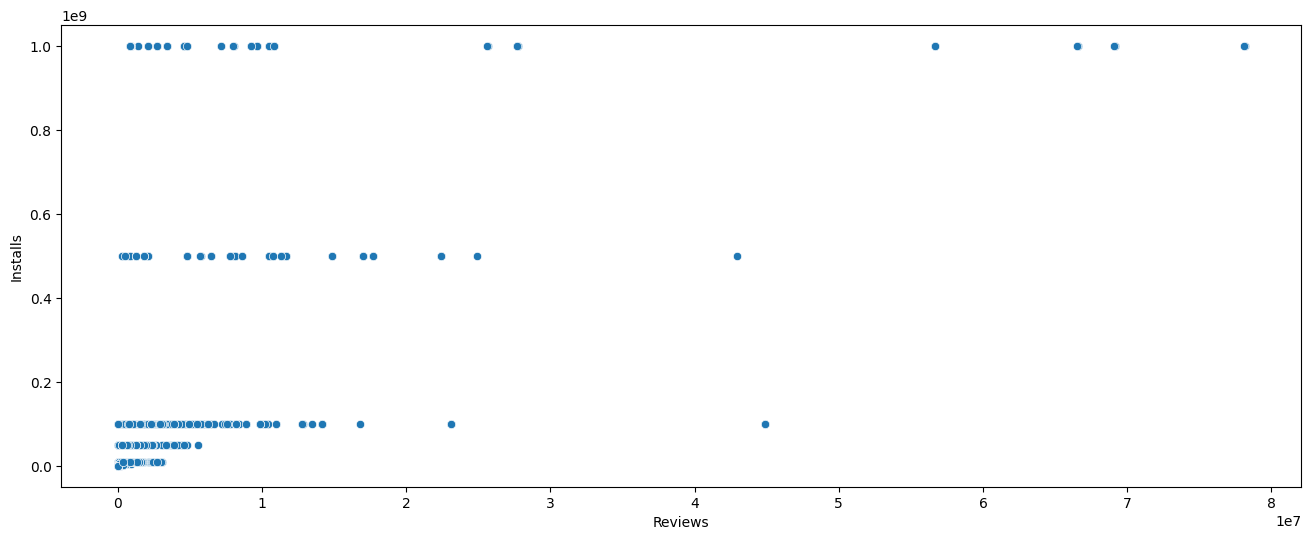

In [185]:
# plot reviews and installs in a scatter plot
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x='Reviews', y='Installs', data=df) # plot the scatter plot

> **Figure-9**  We did not see any trend and the issue is we need to normalize the data before plotting it, let's try with log transformation

- We did not see any trend and the issue is we need to normalize the data before plotting it, let's try with log transformation

<Axes: xlabel='Reviews', ylabel='Installs'>

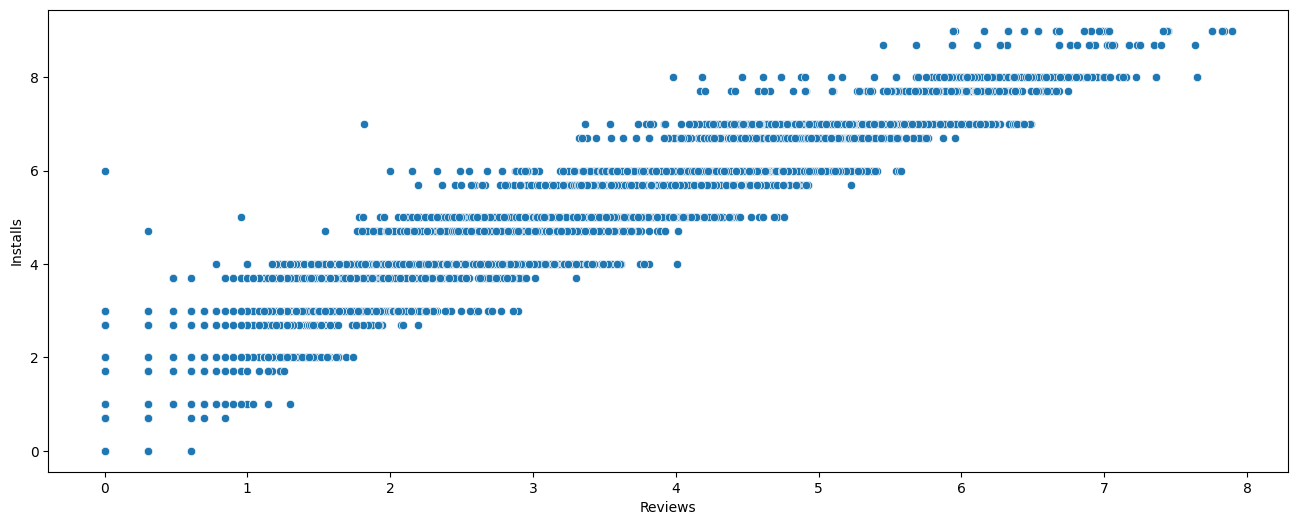

In [186]:
# plot reviews and installs in a scatter plot
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x=np.log10(df['Reviews']), y=np.log10(df['Installs']), data=df) # plot the scatter plot

> **Figure-10** Now we see a slight trend but still the issue is installs were given in a factorial manner, as 10+, 20+, 1000+ etc, and these are not continuous number but Discreet one, therefore, we can only see a slight trends here. Let's plot a line plot to see the trend.

<Figure size 1600x600 with 0 Axes>

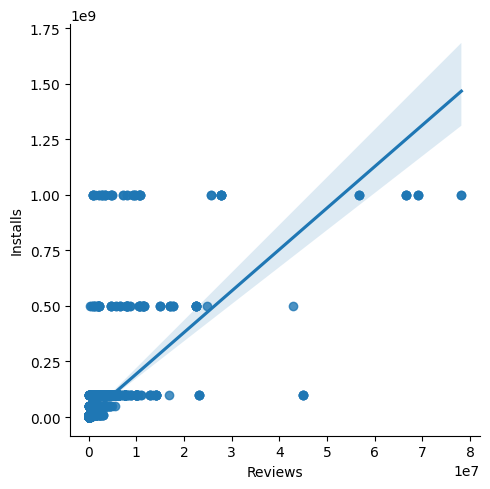

In [187]:
# plot reviews and installs in a scatter plot with trend line
plt.figure(figsize=(16, 6)) # make figure size
sns.lmplot(x='Reviews', y='Installs', data=df) # plot the scatter plot with trend line


> **Figure-11**  Here, we can see a nice trend, which shows that number of Reviews increases with the number of Installs, which is quite obvious.

---
## **Observation**
-We can see that most of the null values from `Rating` column are no - Moderate Installation apps, which make sense that if the app has less installations, it has less Rating and review.

- But wait, we have to check for the duplicates as well, as they can affect our analysis.

## 2.3. **Duplicates**

* Removing duplicates is one of the most important part of the data wrangling process, we must remove the duplicates in order to get the correct insights from the data.
* If you do not remove duplicates from a dataset, it can lead to incorrect insights and analysis. 
* Duplicates can skew statistical measures such as mean, median, and standard deviation, and can also lead to over-representation of certain data points. 
* It is important to remove duplicates to ensure the accuracy and reliability of your data analysis.


In [188]:
# find duplicate if any
df.duplicated().sum()

np.int64(483)

This shows us total duplicates, but we can also check based on the app name, as we know that every app has a unique name.

In [189]:
# find duplicate if any in the 'App' column
df['App'].duplicated().sum()

np.int64(1181)

- Oops! we have 1181 dupicate app names
- Can we find a column which can help us to remove the duplicates?

let's check for number of duplicates in each column using a for loop and printing the output

In [190]:
# let's check for number of duplicates
for col in df.columns:
    print(f"Number of duplicates in {col} column are: {df[col].duplicated().sum()}")

Number of duplicates in App column are: 1181
Number of duplicates in Category column are: 10796
Number of duplicates in Rating column are: 10784
Number of duplicates in Reviews column are: 4830
Number of duplicates in Size_in_bytes column are: 10373
Number of duplicates in Installs column are: 10809
Number of duplicates in Type column are: 10827
Number of duplicates in Price column are: 10737
Number of duplicates in Content Rating column are: 10823
Number of duplicates in Genres column are: 10710
Number of duplicates in Last Updated column are: 9453
Number of duplicates in Current Ver column are: 7998
Number of duplicates in Android Ver column are: 10796
Number of duplicates in Size_in_Mb column are: 10373
Number of duplicates in Installs_category column are: 10821


This means that the only better way to find duplicates is to check for whole data

In [191]:
# print the number of duplicates in df
print(f"Number of duplicates in df are: {df.duplicated().sum()}")

Number of duplicates in df are: 483


- Find and watch all duplicates if they are real!

In [192]:
# find exact duplicates and print them
df[df['App'].duplicated(keep=False)].sort_values(by='App').head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Installs_category
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3984588.8,500000,Free,0.00,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,3.8,High
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3984588.8,500000,Free,0.00,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,3.8,High
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160,27262976.0,1000000,Free,0.00,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up,26.0,High
2322,1800 Contacts - Lens Store,MEDICAL,4.7,23160,27262976.0,1000000,Free,0.00,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up,26.0,High
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3984588.8,1000,Paid,16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up,3.8,Low


- Remove Duplicates

In [193]:
# remove the duplicates
df.drop_duplicates(inplace=True)

In [194]:
# print the number of rows and columns after removing duplicates
print(f"Number of rows after removing duplicates: {df.shape[0]}")

Number of rows after removing duplicates: 10346


- Now we have removed 483 duplicates from the dataset. and have 10346 rows left.

---

## **3. Insights from Data**

## **3.1. Which category has the highest number of apps?**

In [195]:
# which category has highest number of apps
df['Category'].value_counts().head(10) # this will show the top 10 categories with highest number of apps

Category
FAMILY             1939
GAME               1121
TOOLS               841
BUSINESS            427
MEDICAL             408
PRODUCTIVITY        407
PERSONALIZATION     386
LIFESTYLE           373
COMMUNICATION       366
FINANCE             360
Name: count, dtype: int64

# **3.2. Which category has the highest number of installs?**

In [196]:
# category with highest number of Installs
df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)

Category
GAME                  31544024415
COMMUNICATION         24152276251
SOCIAL                12513867902
PRODUCTIVITY          12463091369
TOOLS                 11452271905
FAMILY                10041632405
PHOTOGRAPHY            9721247655
TRAVEL_AND_LOCAL       6361887146
VIDEO_PLAYERS          6222002720
NEWS_AND_MAGAZINES     5393217760
Name: Installs, dtype: int64

# **3.3. Which category has the highest number of reviews?**

In [197]:
# Category with highest number of Reviews
df.groupby('Category')['Reviews'].sum().sort_values(ascending=False).head(10)

Category
GAME               1415536650
COMMUNICATION       601273552
SOCIAL              533576829
FAMILY              396771746
TOOLS               273181033
PHOTOGRAPHY         204297410
VIDEO_PLAYERS       110380188
PRODUCTIVITY        102554498
SHOPPING             94931162
PERSONALIZATION      75192744
Name: Reviews, dtype: int64

# **3.4. Which category has the highest rating?**

In [198]:
# Category with highest average Rating
df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)

Category
EVENTS                 4.394346
EDUCATION              4.373794
ART_AND_DESIGN         4.367122
BOOKS_AND_REFERENCE    4.358435
PERSONALIZATION        4.333325
GAME                   4.281926
HEALTH_AND_FITNESS     4.273890
SOCIAL                 4.260441
PARENTING              4.259759
SHOPPING               4.253376
Name: Rating, dtype: float64

<Axes: xlabel='Rating', ylabel='Density'>

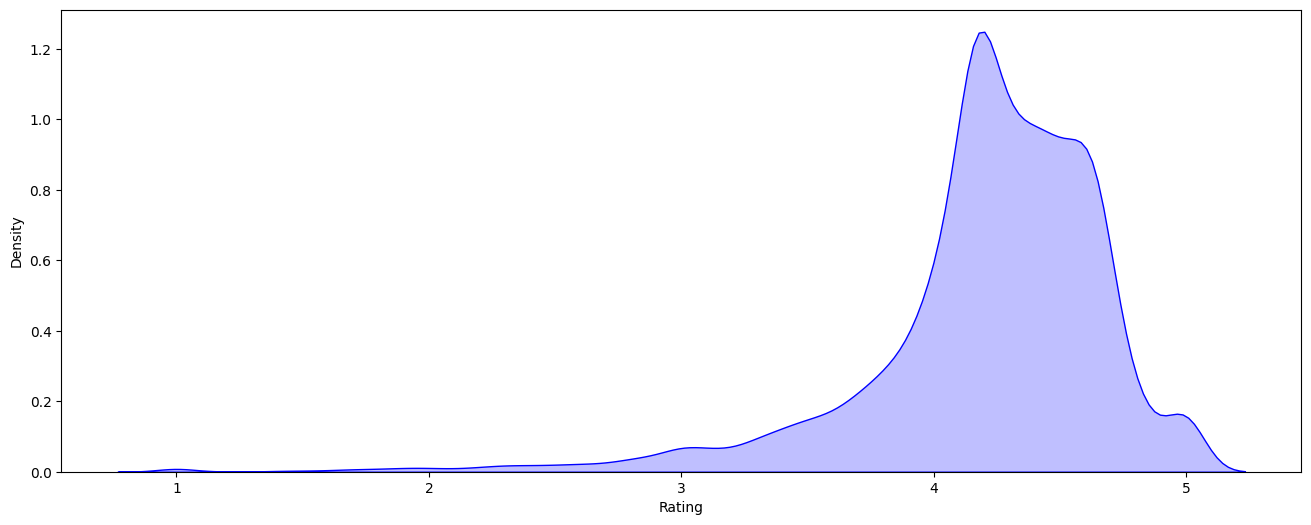

In [199]:
# plot the rating distribution
plt.figure(figsize=(16, 6)) # make figure size
sns.kdeplot(df['Rating'], color="blue", shade=True) # plot the distribution plot

> **Figure-12** This graph show the Rating Density

# **3.5. Which paid app has higest install**

In [200]:
# which paid app has highest install with rating
paid_apps = df[df['Type'] == 'Paid'] # filter the dataframe for paid apps
highest_paid_app = paid_apps.loc[paid_apps['Installs'].idxmax()] # find the app with highest installs
print(f"The paid app with highest installs is: {highest_paid_app['App']} with {highest_paid_app['Installs']} installs and {highest_paid_app['Rating']} rating.") # print the app name, installs and rating


The paid app with highest installs is: Minecraft with 10000000 installs and 4.5 rating.


In [201]:
# find the highest install paid app belong to which category
highest_paid_app_category = highest_paid_app['Category']
print(f"The highest install paid app belongs to the '{highest_paid_app_category}' category.")
# find the highest install paid app belong to which genre
highest_paid_app_genre = highest_paid_app['Genres']
print(f"The highest install paid app belongs to the '{highest_paid_app_genre}' genre.")

The highest install paid app belongs to the 'FAMILY' category.
The highest install paid app belongs to the 'Arcade;Action & Adventure' genre.


# **3.6. Which free app has higest install**

In [202]:
# which free app has highest install with rating
free_apps = df[df['Type'] == 'Free'] # filter the dataframe for free apps
highest_free_app = free_apps.loc[free_apps['Installs'].idxmax()] # find the app with highest installs
print(f"The free app with highest installs is: {highest_free_app['App']} with {highest_free_app['Installs']} installs and {highest_free_app['Rating']} rating.") # print the app name, installs and rating

The free app with highest installs is: Google Play Books with 1000000000 installs and 3.9 rating.


In [203]:
#  find the highest install free app belong to which category
highest_free_app_category = highest_free_app['Category']
print(f"The highest install free app belongs to the '{highest_free_app_category}' category.")
# find the highest install free app belong to which genre
highest_free_app_genre = highest_free_app['Genres']
print(f"The highest install free app belongs to the '{highest_free_app_genre}' genre.")

The highest install free app belongs to the 'BOOKS_AND_REFERENCE' category.
The highest install free app belongs to the 'Books & Reference' genre.


In [204]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Installs_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0,Moderate
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7,Very High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0,Top Notch
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8,More than moderate


# **3.7. Ratio of Installs to Price of app**

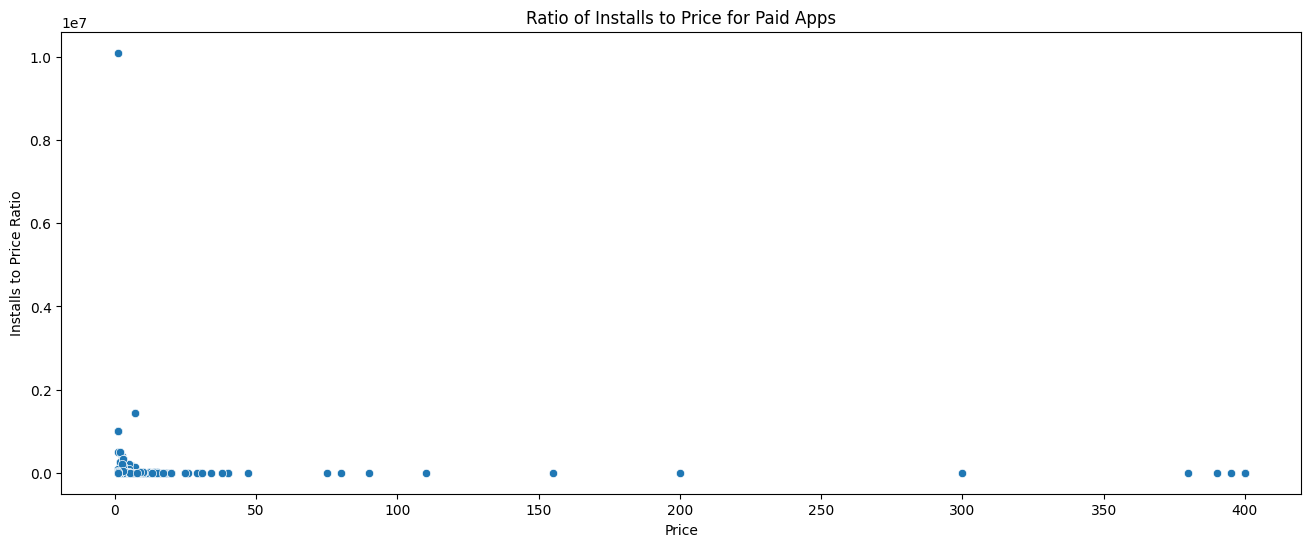

In [205]:
#plot the ratio of installs to price
paid_apps = df[df['Price'] > 0]
plt.figure(figsize=(16, 6))    
sns.scatterplot(x='Price', y=paid_apps['Installs'] / paid_apps['Price'], data=paid_apps)
plt.xlabel('Price')
plt.ylabel('Installs to Price Ratio')
plt.title('Ratio of Installs to Price for Paid Apps')
plt.show()


> **Figure-13** This show the Ratio of installs to price for paid apps

# **3.8.  Plot number of installs for free vs paid apps**


<Axes: xlabel='Installs', ylabel='Price'>

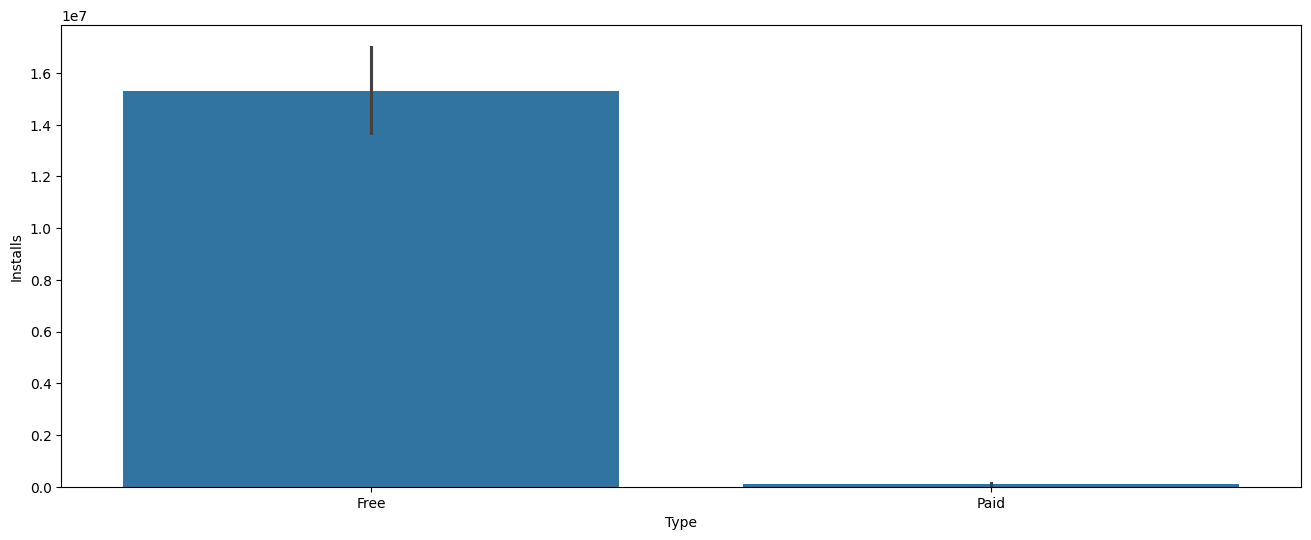

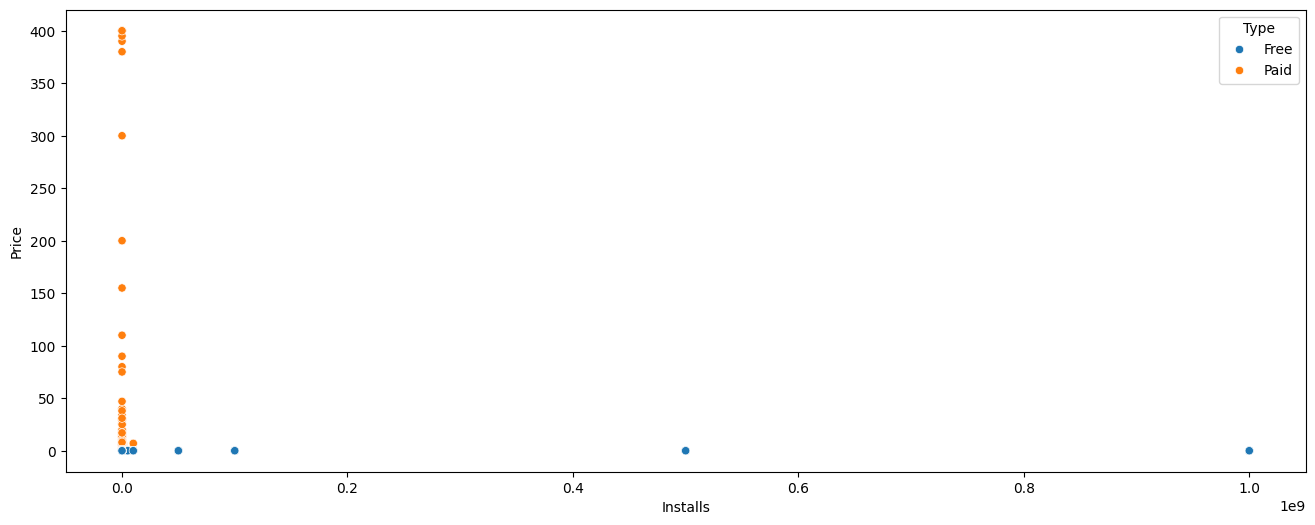

In [206]:
# plot number of installs for free vs paid apps make a bar plot
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='Type', y='Installs', data=df) # plot the bar plot

# show scatter plot as well where x-axis is Installs and y-axis is Price and hue is Type
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x='Installs', y='Price', hue='Type', data=df) # plot the scatter plot

> **Figure-14** This graph shows the the number of install of free and paid apps

# **3.9. Impact of size on installs**

<Axes: xlabel='Installs_category', ylabel='Size_in_Mb'>

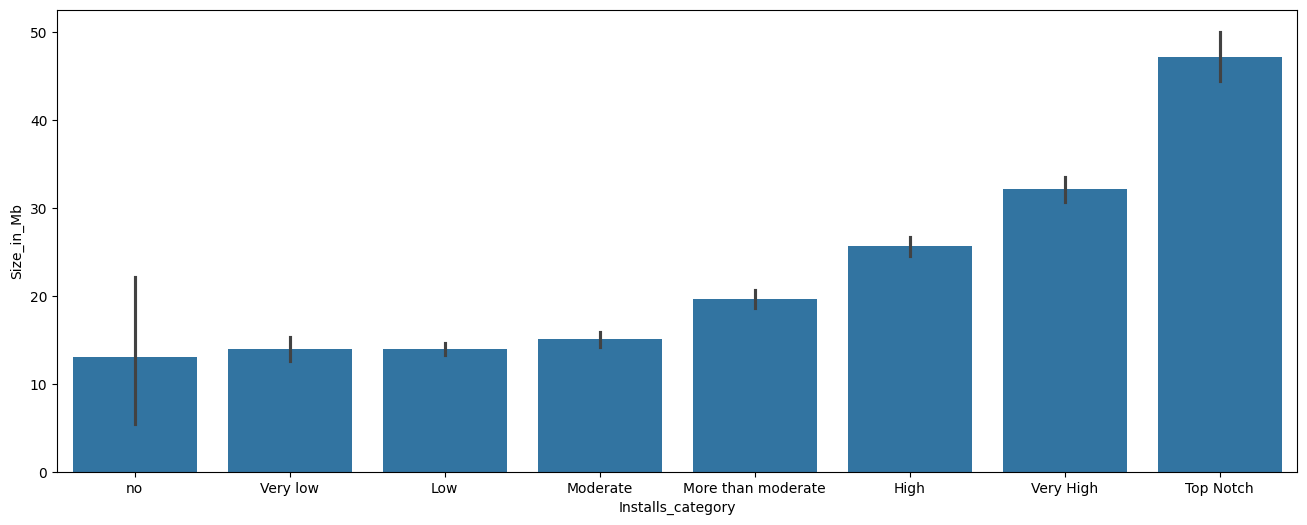

In [207]:
# make a bar plot of Size_in_Mb vs Installs_category
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='Installs_category', y='Size_in_Mb', data=df) # plot the bar plot

> **Figure-15** This graph shows the impact of size on install Ratio

# **3.10. Impact of Rating on Install**

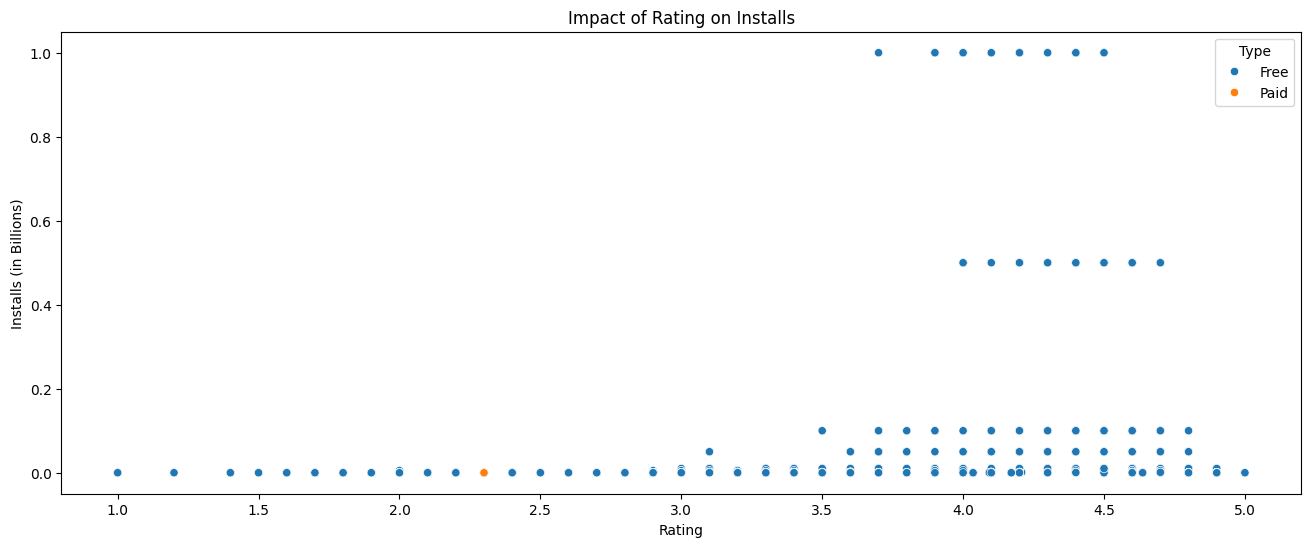

In [208]:
# make a bar plot of Rating vs Installs with hue as Type
# Normalize the y-axis (Installs) by 1e9 for better visualization
plt.figure(figsize=(16, 6))
sns.scatterplot(x='Rating', y=df['Installs'] / 1e9, hue='Type', data=df)
plt.xlabel('Rating')
plt.ylabel('Installs (in Billions)')
plt.title('Impact of Rating on Installs')
plt.legend(title='Type')
plt.show()


> **Figure-16** This scatter plot show the how Rating impact the Install Ratio

# **3.11. Which content rating is most popular in installs**

In [209]:
# Which content rating is most popular in installs
df['Content Rating'].value_counts() # this will show the value counts of each content rating

Content Rating
Everyone           8372
Teen               1146
Mature 17+          447
Everyone 10+        376
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

<Axes: xlabel='Content Rating', ylabel='Installs'>

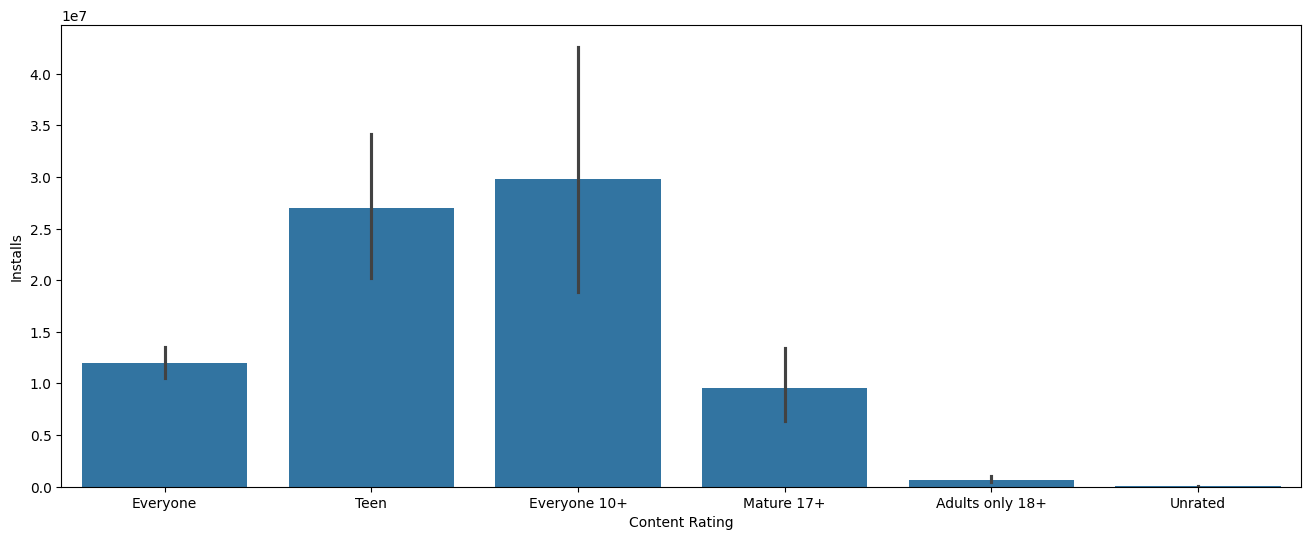

In [210]:
# plot the bar plot of Content Rating vs Installs
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='Content Rating', y='Installs', data=df) # plot the bar plot

> **Figure-17** This bar plot show the papular content Rating

In [211]:
# find how many apps are there in Everyone content rating
df['Category'].loc[df['Content Rating'] == 'Everyone'].value_counts()

Category
FAMILY                 1498
TOOLS                   833
GAME                    595
BUSINESS                412
PRODUCTIVITY            396
MEDICAL                 390
FINANCE                 355
LIFESTYLE               337
COMMUNICATION           325
SPORTS                  318
PERSONALIZATION         318
PHOTOGRAPHY             307
HEALTH_AND_FITNESS      275
TRAVEL_AND_LOCAL        230
BOOKS_AND_REFERENCE     200
SHOPPING                183
NEWS_AND_MAGAZINES      168
VIDEO_PLAYERS           146
MAPS_AND_NAVIGATION     133
EDUCATION               121
FOOD_AND_DRINK          114
SOCIAL                   98
LIBRARIES_AND_DEMO       84
AUTO_AND_VEHICLES        83
WEATHER                  78
HOUSE_AND_HOME           78
ART_AND_DESIGN           60
PARENTING                58
EVENTS                   53
BEAUTY                   45
ENTERTAINMENT            37
COMICS                   26
DATING                   18
Name: count, dtype: int64

# **3.12. Top rated 5 paid apps**

<Axes: xlabel='App', ylabel='Rating'>

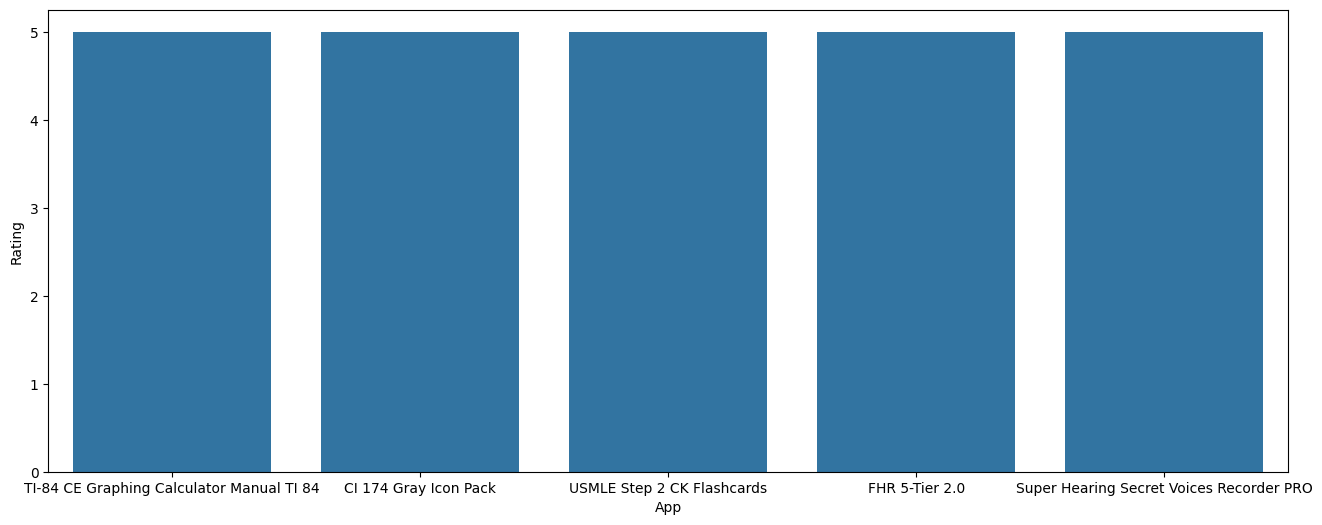

In [212]:
# plot top 5 rated paid apps
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='App', y='Rating', data=df[df['Type'] == 'Paid'].sort_values(by='Rating', ascending=False).head(5)) # plot the bar plot

> **Figure-18** Show the top Rated 5 Paid Apps

In [213]:
df[df['Type'] == 'Paid'].sort_values(by='Rating', ascending=False).head(5)

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Installs_category
7204,TI-84 CE Graphing Calculator Manual TI 84,FAMILY,5.0,1,28311552.0,100,Paid,4.99,Everyone,Education,"March 28, 2018",1.5.2,4.1 and up,27.0,Low
7377,CI 174 Gray Icon Pack,PERSONALIZATION,5.0,1,48234496.0,10,Paid,0.99,Everyone,Personalization,"May 21, 2018",1.1,4.1 and up,46.0,Very low
7477,USMLE Step 2 CK Flashcards,FAMILY,5.0,1,41943040.0,10,Paid,19.99,Everyone,Education,"May 26, 2014",2.47,2.2 and up,40.0,Very low
2271,FHR 5-Tier 2.0,MEDICAL,5.0,2,1258291.2,500,Paid,2.99,Everyone,Medical,"December 16, 2015",1.0,4.0 and up,1.2,Low
2262,Super Hearing Secret Voices Recorder PRO,MEDICAL,5.0,3,24117248.0,100,Paid,2.99,Everyone,Medical,"April 20, 2018",1.0,4.1 and up,23.0,Low


# **3.13. Top rated 5 free apps**

<Axes: xlabel='App', ylabel='Rating'>

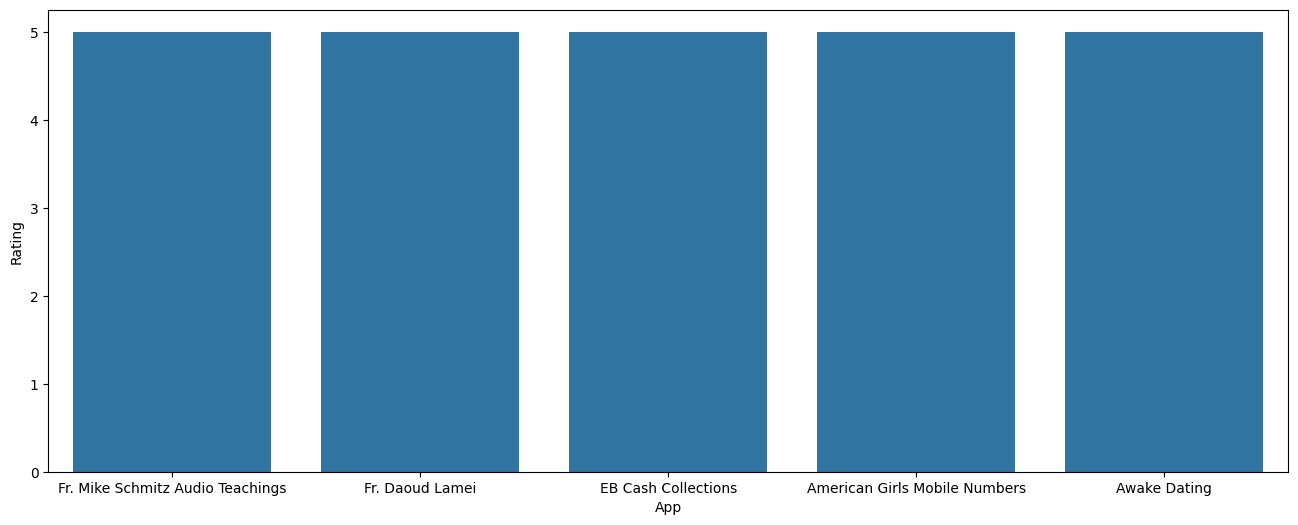

In [214]:
# plot top rated 5 apps in free category
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='App', y='Rating', data=df[df['Type'] == 'Free'].sort_values(by='Rating', ascending=False).head(5)) # plot the bar plot

> **Figure-19** This bar plot show us the top Rated 5 Free Apps 

In [215]:
df[df['Type'] == 'Free'].sort_values(by='Rating', ascending=False).head(5)

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Installs_category
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3774873.6,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,3.6,Low
10820,Fr. Daoud Lamei,FAMILY,5.0,22,9017753.6,1000,Free,0.0,Teen,Education,"June 27, 2018",3.8.0,4.1 and up,8.6,Low
9218,EB Cash Collections,BUSINESS,5.0,1,4508876.8,5,Free,0.0,Everyone,Business,"July 31, 2018",1.10,4.4 and up,4.3,Very low
612,American Girls Mobile Numbers,DATING,5.0,5,4613734.4,1000,Free,0.0,Mature 17+,Dating,"July 17, 2018",3.0,4.0.3 and up,4.4,Low
615,Awake Dating,DATING,5.0,2,73400320.0,100,Free,0.0,Mature 17+,Dating,"July 24, 2018",2.2.9,4.4 and up,70.0,Low


# **3.15. Top 5 free apps with higest reviews**

<Axes: xlabel='App', ylabel='Reviews'>

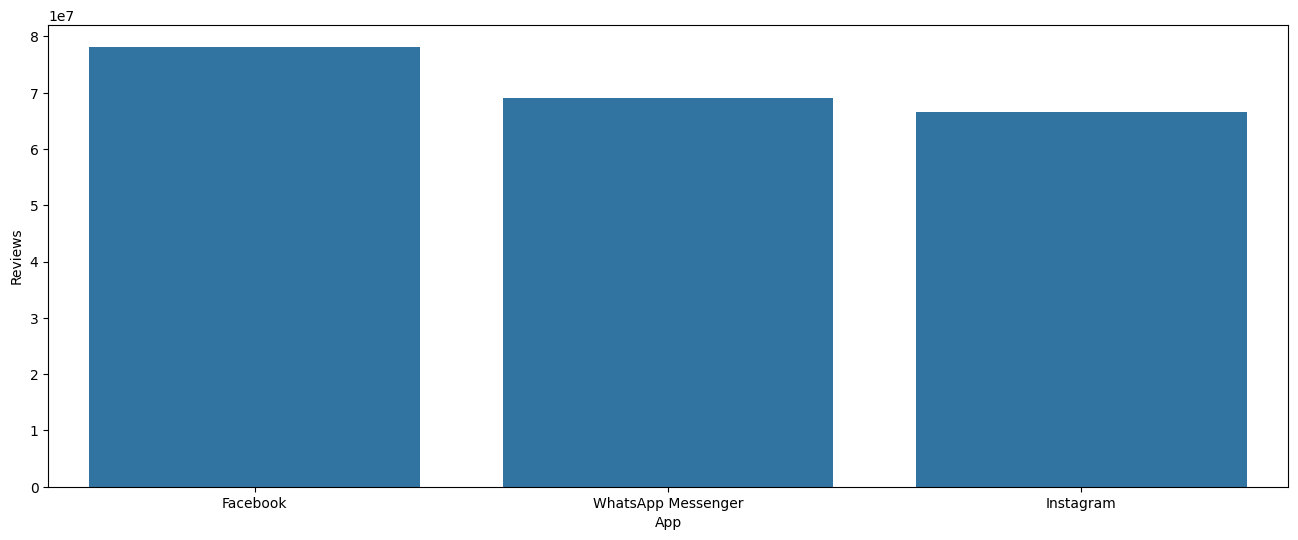

In [216]:
# Plot top 5 FREE apps with highest number of reviews
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='App', y='Reviews', data=df[df['Type'] == 'Free'].sort_values(by='Reviews', ascending=False).head(5)) # plot the bar plot

> **Figure-20** Higest Reviews Free apps

In [217]:
df[df['Type'] == 'Free'].sort_values(by='Reviews', ascending=False).head(5)

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Installs_category
2544,Facebook,SOCIAL,4.1,78158306,NaN,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,NaN,Top Notch
3943,Facebook,SOCIAL,4.1,78128208,NaN,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,NaN,Top Notch
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,NaN,Top Notch
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,NaN,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,NaN,Top Notch
2604,Instagram,SOCIAL,4.5,66577446,NaN,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device,NaN,Top Notch


# **3.16. Top 5 paid apps with higest number of reviews**

<Axes: xlabel='App', ylabel='Reviews'>

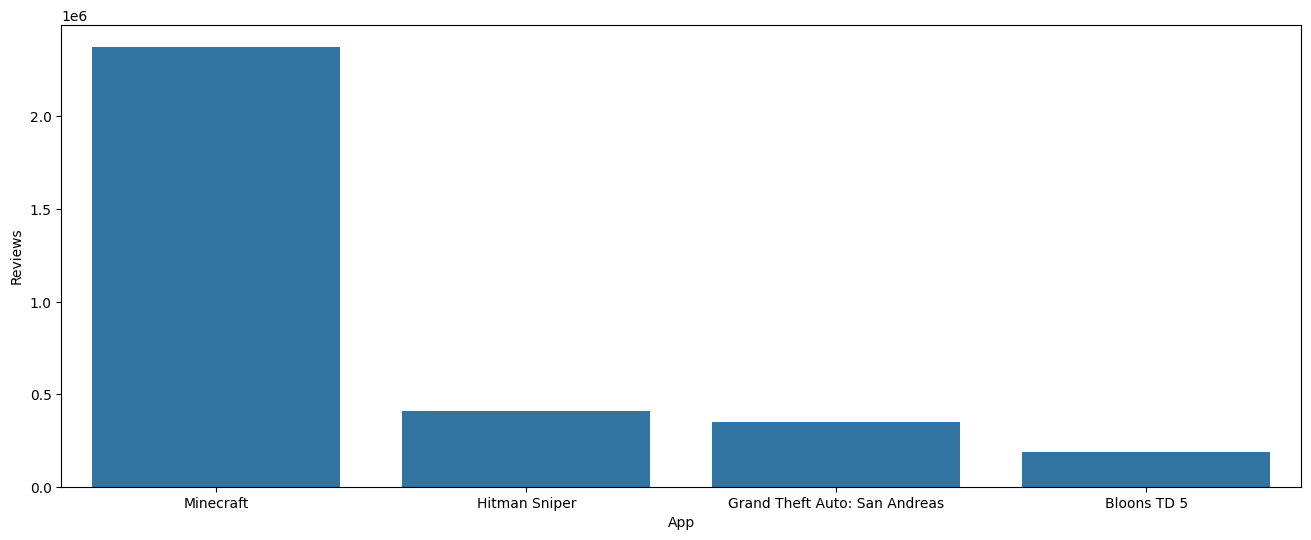

In [218]:
# Plot top 5 Paid apps with highest number of reviews
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='App', y='Reviews', data=df[df['Type'] == 'Paid'].sort_values(by='Reviews', ascending=False).head(5)) # plot the bar plot

> **Figure-21** Paid Apps having top Reviews

# **3.17. Free 5 apps with lowest reviews**

Text(0, 0.5, 'Reviews')

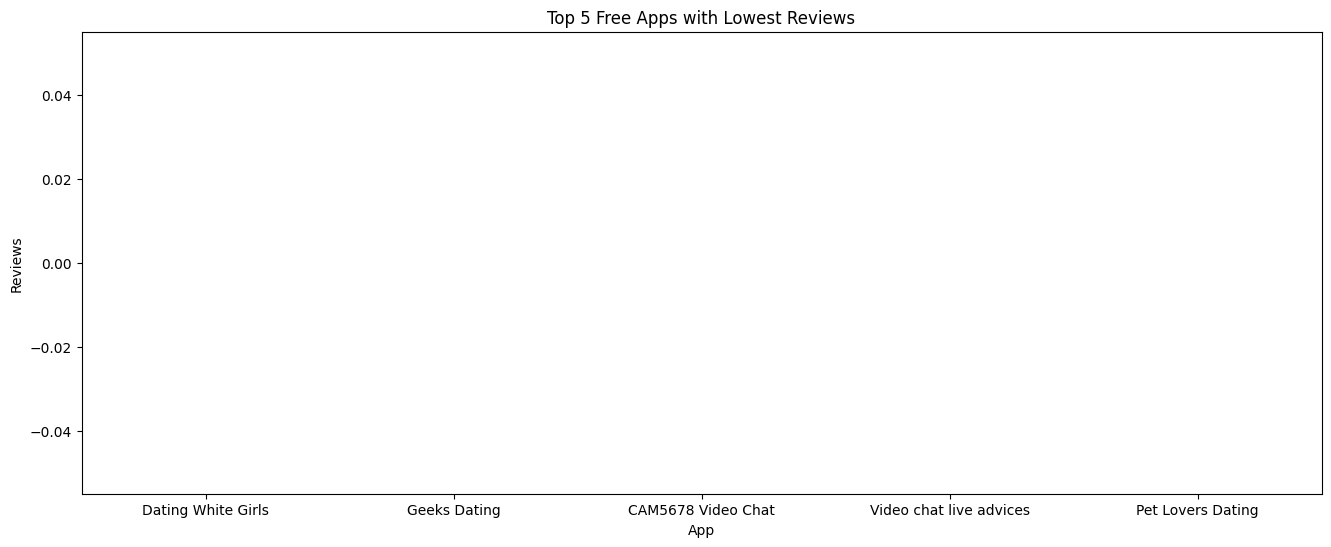

In [219]:
# plot 5 apps has lowest reviews in free category
plt.figure(figsize=(16, 6)) # make figure size
lowest_reviewed_free_apps = df[df['Type'] == 'Free'].nsmallest(5, 'Reviews') # find the 5 apps with lowest reviews in free category
sns.barplot(x='App', y='Reviews', data=lowest_reviewed_free_apps) # plot the bar plot
plt.title('Top 5 Free Apps with Lowest Reviews') # add the title for the plot
plt.xlabel('App') # add the x-axis label
plt.ylabel('Reviews') # add the y-axis label    

> **Figure-22** Free apps having lowest Reviews

In [220]:
# list of 5 free apps has the lowest reviews
lowest_reviewed_free_apps[['App', 'Reviews']]

,App,Reviews
621,Dating White Girls,0
623,Geeks Dating,0
627,CAM5678 Video Chat,0
628,Video chat live advices,0
630,Pet Lovers Dating,0


# **3.18. Paid 5 apps with lowest reviews**

Text(0, 0.5, 'Reviews')

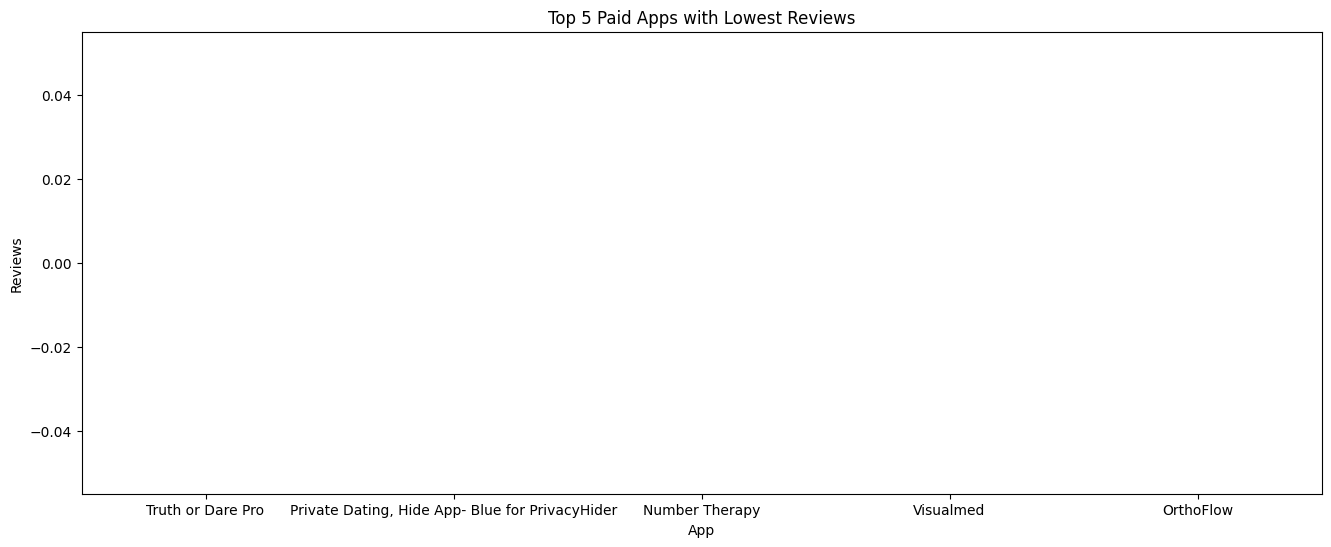

In [221]:
# plot 5 paid apps has lowest reviews
plt.figure(figsize=(16, 6)) # make figure size
lowest_reviewed_paid_apps = df[df['Type'] == 'Paid'].nsmallest(5, 'Reviews') # find the 5 apps with lowest reviews in paid category
sns.barplot(x='App', y='Reviews', data=lowest_reviewed_paid_apps) # plot the bar plot
plt.title('Top 5 Paid Apps with Lowest Reviews') # add the title for the plot
plt.xlabel('App') # add the x-axis label
plt.ylabel('Reviews') # add the y-axis label

> **Figre-23** Paid Apps having lowest Reviews

In [222]:
# list of 5 paid apps has the lowest reviews
lowest_reviewed_paid_apps[['App', 'Reviews']]

,App,Reviews
478,Truth or Dare Pro,0
479,"Private Dating, Hide App- Blue for PrivacyHider",0
2294,Number Therapy,0
2422,Visualmed,0
2424,OrthoFlow,0


# **3.19. Top 5 paid apps with higest rating**

Text(0, 0.5, 'Rating')

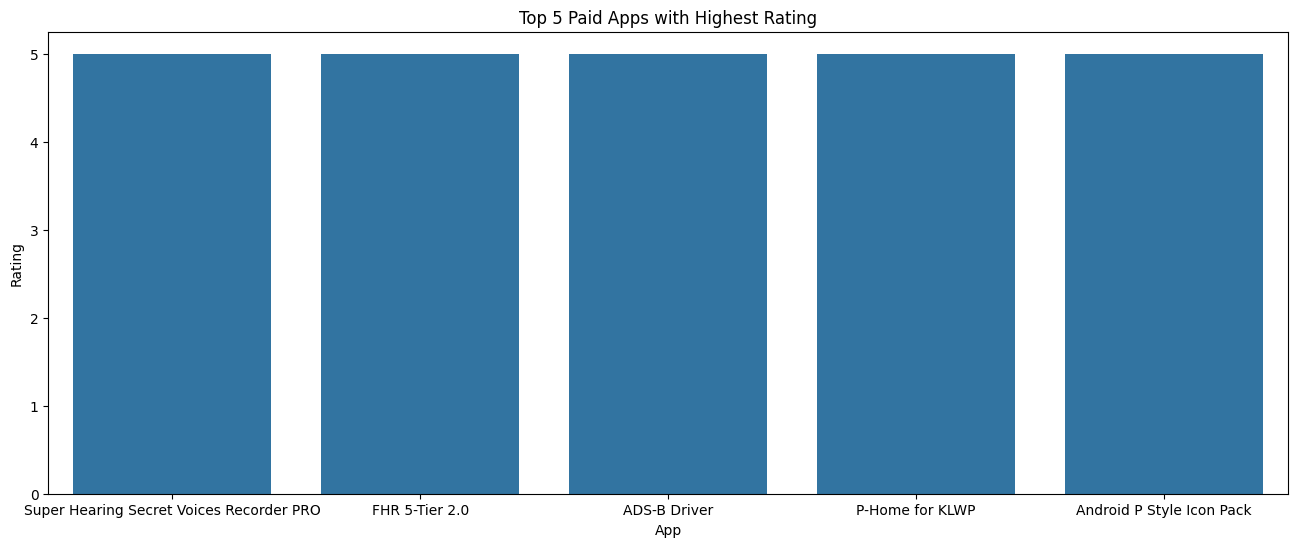

In [223]:
# plot 5 paid apps has highest rating
plt.figure(figsize=(16, 6)) # make figure size
highest_rated_paid_apps = df[df['Type'] == 'Paid'].nlargest(5, 'Rating') # find the 5 apps with highest rating in paid category
sns.barplot(x='App', y='Rating', data=highest_rated_paid_apps) # plot the bar plot
plt.title('Top 5 Paid Apps with Highest Rating') # add the title for the plot
plt.xlabel('App') # add the x-axis label
plt.ylabel('Rating') # add the y-axis label

> **Figure-24** This bar plot show the Top 5 paid Apps with higest Rating

In [224]:
# list of 5 paid apps has the highest rating
highest_rated_paid_apps[['App', 'Rating']]

,App,Rating
2262,Super Hearing Secret Voices Recorder PRO,5.0
2271,FHR 5-Tier 2.0,5.0
3957,ADS-B Driver,5.0
4452,P-Home for KLWP,5.0
4477,Android P Style Icon Pack,5.0


# **3.20. Top 5 free apps with higest rating**

Text(0, 0.5, 'Rating')

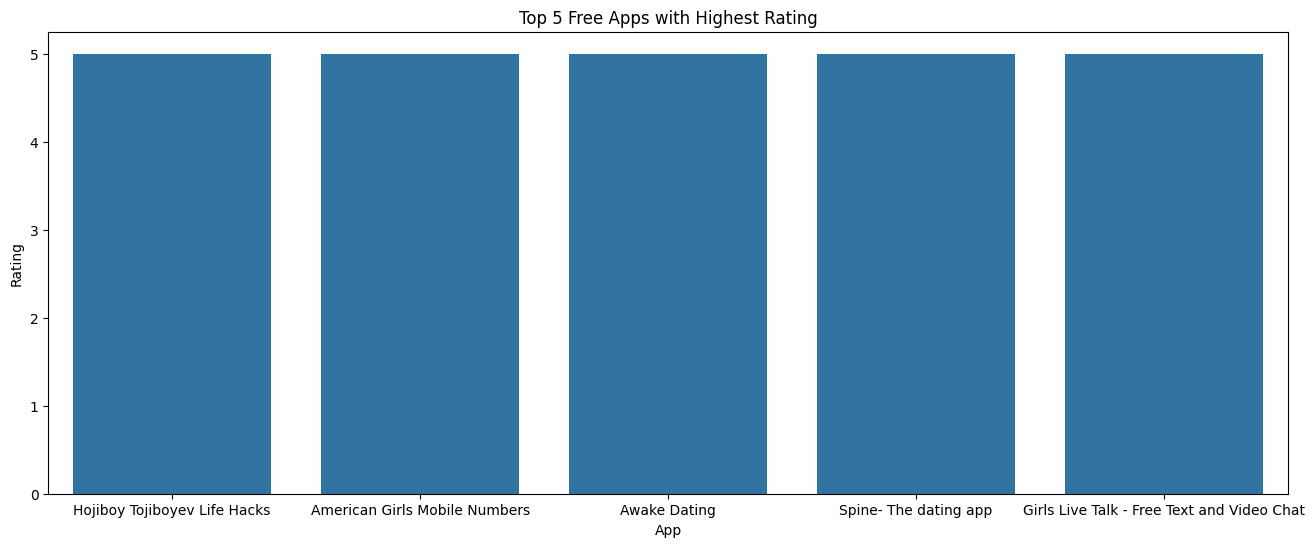

In [225]:
# plot 5 free apps has highest rating
plt.figure(figsize=(16, 6)) # make figure size
highest_rated_free_apps = df[df['Type'] == 'Free'].nlargest(5, 'Rating') # find the 5 apps with highest rating in free category
sns.barplot(x='App', y='Rating', data=highest_rated_free_apps) # plot the bar plot
plt.title('Top 5 Free Apps with Highest Rating') # add the title for the plot
plt.xlabel('App') # add the x-axis label
plt.ylabel('Rating') # add the y-axis label

> **Figure-25** This bar plot show the Top 5 Free Apps with higest Rating

In [226]:
# list of 5 free apps has the highest rating
highest_rated_free_apps[['App', 'Rating']]

,App,Rating
329,Hojiboy Tojiboyev Life Hacks,5.0
612,American Girls Mobile Numbers,5.0
615,Awake Dating,5.0
633,Spine- The dating app,5.0
636,Girls Live Talk - Free Text and Video Chat,5.0


# **3.21. Free 5 apps with lowest rating**

Text(0, 0.5, 'Rating')

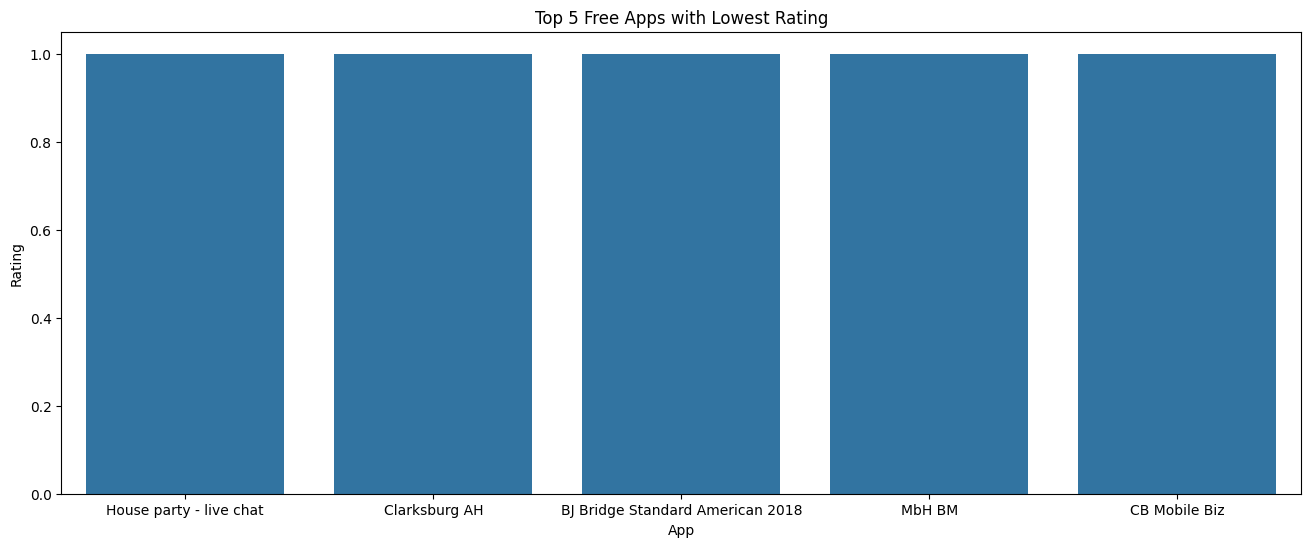

In [227]:
# plot 5 apps has lowest rating
plt.figure(figsize=(16, 6)) # make figure size
lowest_rated_free_apps = df[df['Type'] == 'Free'].nsmallest(5, 'Rating') # find the 5 apps with lowest rating in free category
sns.barplot(x='App', y='Rating', data=lowest_rated_free_apps) # plot the bar plot
plt.title('Top 5 Free Apps with Lowest Rating') # add the title for the plot
plt.xlabel('App') # add the x-axis label
plt.ylabel('Rating') # add the y-axis label

> **Figure-26** Top 5 Free Apps with Lowest Rating

In [228]:
# free 5 apps with lowest rating
lowest_rated_free_apps = df[df['Type'] == 'Free'].nsmallest(5, 'Rating')
lowest_rated_free_apps[['App', 'Rating']]

,App,Rating
625,House party - live chat,1.0
5151,Clarksburg AH,1.0
6319,BJ Bridge Standard American 2018,1.0
6490,MbH BM,1.0
7144,CB Mobile Biz,1.0


# **3.22.  paid 5 apps with lowest rating**

Text(0, 0.5, 'Rating')

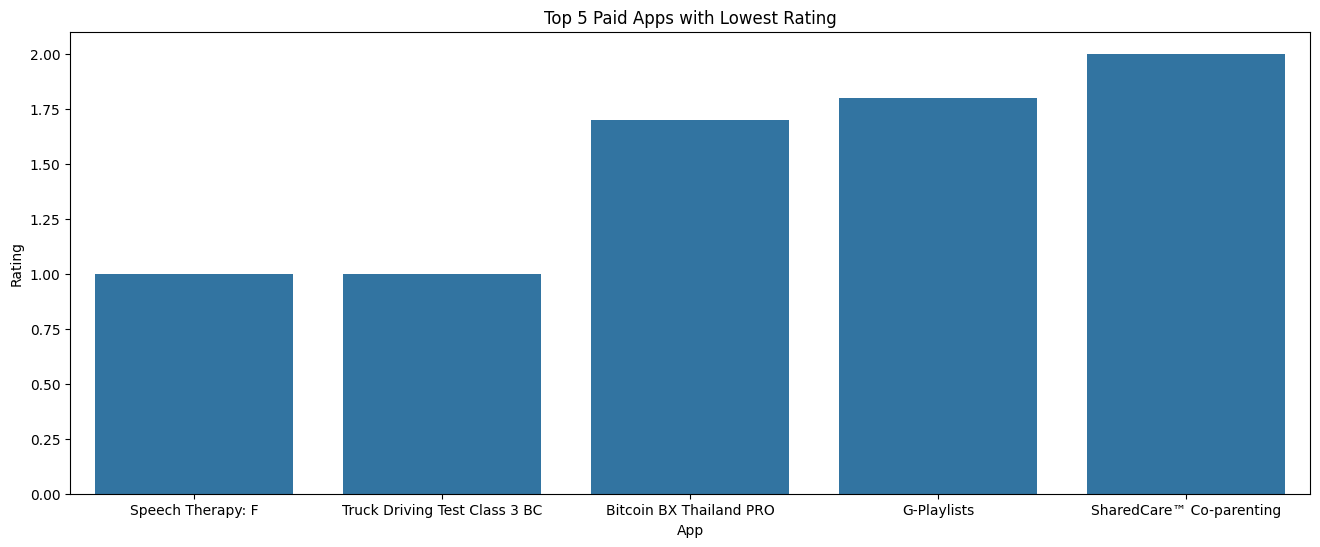

In [229]:
# plot 5 paid apps has lowest rating
plt.figure(figsize=(16, 6)) # make figure size
lowest_rated_paid_apps = df[df['Type'] == 'Paid'].nsmallest(5, 'Rating') # find the 5 apps with lowest rating in paid category
sns.barplot(x='App', y='Rating', data=lowest_rated_paid_apps) # plot the bar plot
plt.title('Top 5 Paid Apps with Lowest Rating') # add the title for the plot
plt.xlabel('App') # add the x-axis label
plt.ylabel('Rating') # add the y-axis label

> **Figure-27** Top 5 Paid Apps with Lowest Rating

In [230]:
# list of 5 paid apps has the lowest rating
lowest_rated_paid_apps[['App', 'Rating']]

,App,Rating
4127,Speech Therapy: F,1.0
5978,Truck Driving Test Class 3 BC,1.0
6948,Bitcoin BX Thailand PRO,1.7
4161,G-Playlists,1.8
7658,SharedCare™ Co-parenting,2.0


-- Good Luck and Go Head!